In [1]:
###   Figure 3

###   patients level
###   Performance comparison between the ControlNet (PPS) marker and tissue eosinophil (EOS) marker for predicting treatment outcome of NP patients. 


In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Flatten, Dense, Lambda
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Flatten, Activation
#from tensorflow.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.keras.utils import np_utils
import os
import numpy as np
from tqdm import tqdm 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import efficientnet.tfkeras as efn 
from tensorflow.keras.models import Model, load_model
model_a = load_model('efficientnet_0.001.h5')   #0.001
model_b = load_model('efficientnet_0.01.h5')   #0.01
model_c = load_model('efficientnet_0.0008.h5')   #0.0008

In [3]:
##  Take out the horizontal and vertical coordinate position of patch in wsi from the naming, which is convenient for drawing.

import os
def get_data(dir_path):
    P = []
    X = []
    Y = []
    for file in tqdm(os.listdir(dir_path)):
        image = load_img(dir_path + '/' + file,target_size=(256,256))
        image = img_to_array(image)
        image /= 255
        P.append(image)
        x = file.split('.')[0].split('_')[-2]   ##  a patch named as 18-14705_20_67.png，take out the horizontal coordinate position '20'
        y = file.split('.')[0].split('_')[-1]   ##  a patch named as 18-14705_20_67.png，take out the vertical coordinate position '67'
        X.append(int(x))
        Y.append(int(y))
    P = np.asarray(P)   
    return X,Y,P

In [4]:
dir_path =  '/media/koalary/Backup Plus/external/124BXZAS11/'  ###  The data storage address of the patch of one of the patients' wsi. Different patients need to change the corresponding path.
x,y,test_image = get_data(dir_path)
Y_pred = (model_a.predict(test_image) + model_b.predict(test_image) + model_c.predict(test_image)) / 3   ###  Obtain the predicted patch-value of the ensemble model
Value = [] 
for i in range(len(Y_pred)):
    Value.append(Y_pred[i][1])  ###  Saving all the predicted patch-value of the ensemble model in 'Value' list
    
y_wsi = np.mean(Value)   ###   Average the value of all the patch on the wsi to get the PPS value of a patient
y_pps = [] 
y_pps.append(y_wsi)    ###   The patient's PPS was stored in list. 

#####    After that, the PPS of all patients is stored in list one by one, and the code is not repeated.

In [5]:
### 1. C vs NC


In [6]:
##   1.1 PPS marker
##  Actual prognosis after treatment, 
##  0 for controlled and partly control, 1 for uncontrolled

y_true = [0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
0,
1
]
##  Each value represents the PPS predicted by the Ensemble model for each patient. 
##  The value is calculated according to the above code through the Ensemble model.
y_pps = [0.16,
0.57,
0.47,
0.51,
0.46,
0.09,
0.16,
0.31,
0.22,
0.19,
0.26,
0.25,
0.06,
0.2,
0.61,
0.15,
0.29,
0.21,
0.53,
0.33,
0.26,
0.34,
0.23,
0.16,
0.41,
0.05,
0.43,
0.44,
0.56,
0.11,
0.33,
0.21,
0.66,
0.53,
0.32,
0.39,
0.24,
0.67,
0.66,
0.74,
0.86,
0.95,
0.73,
0.48,
0.59,
0.51,
0.59,
0.57,
0.85,
0.94,
0.89,
0.66,
0.57,
0.72,
0.69,
0.51,
0.61,
0.94,
0.66,
0.74,
0.86,
0.95,
0.73,
0.48,
0.59,
0.51,
0.59,
0.57,
0.85,
0.94,
0.89,
0.66,
0.57,
0.72,
0.69,
0.7,
0.2,
0.4
]

In [7]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pps)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9434582511505588


In [8]:
maxindex = (tpr-fpr).tolist().index(max(tpr-fpr))
threshold = thresholds[maxindex]
threshold

0.48

In [9]:
max(tpr-fpr)

0.7692307692307692

<ipython-input-10-ea2704d0bb9f>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(threshold,max(tpr-fpr),marker = 'o',s = 100,color = '',edgecolor='red')


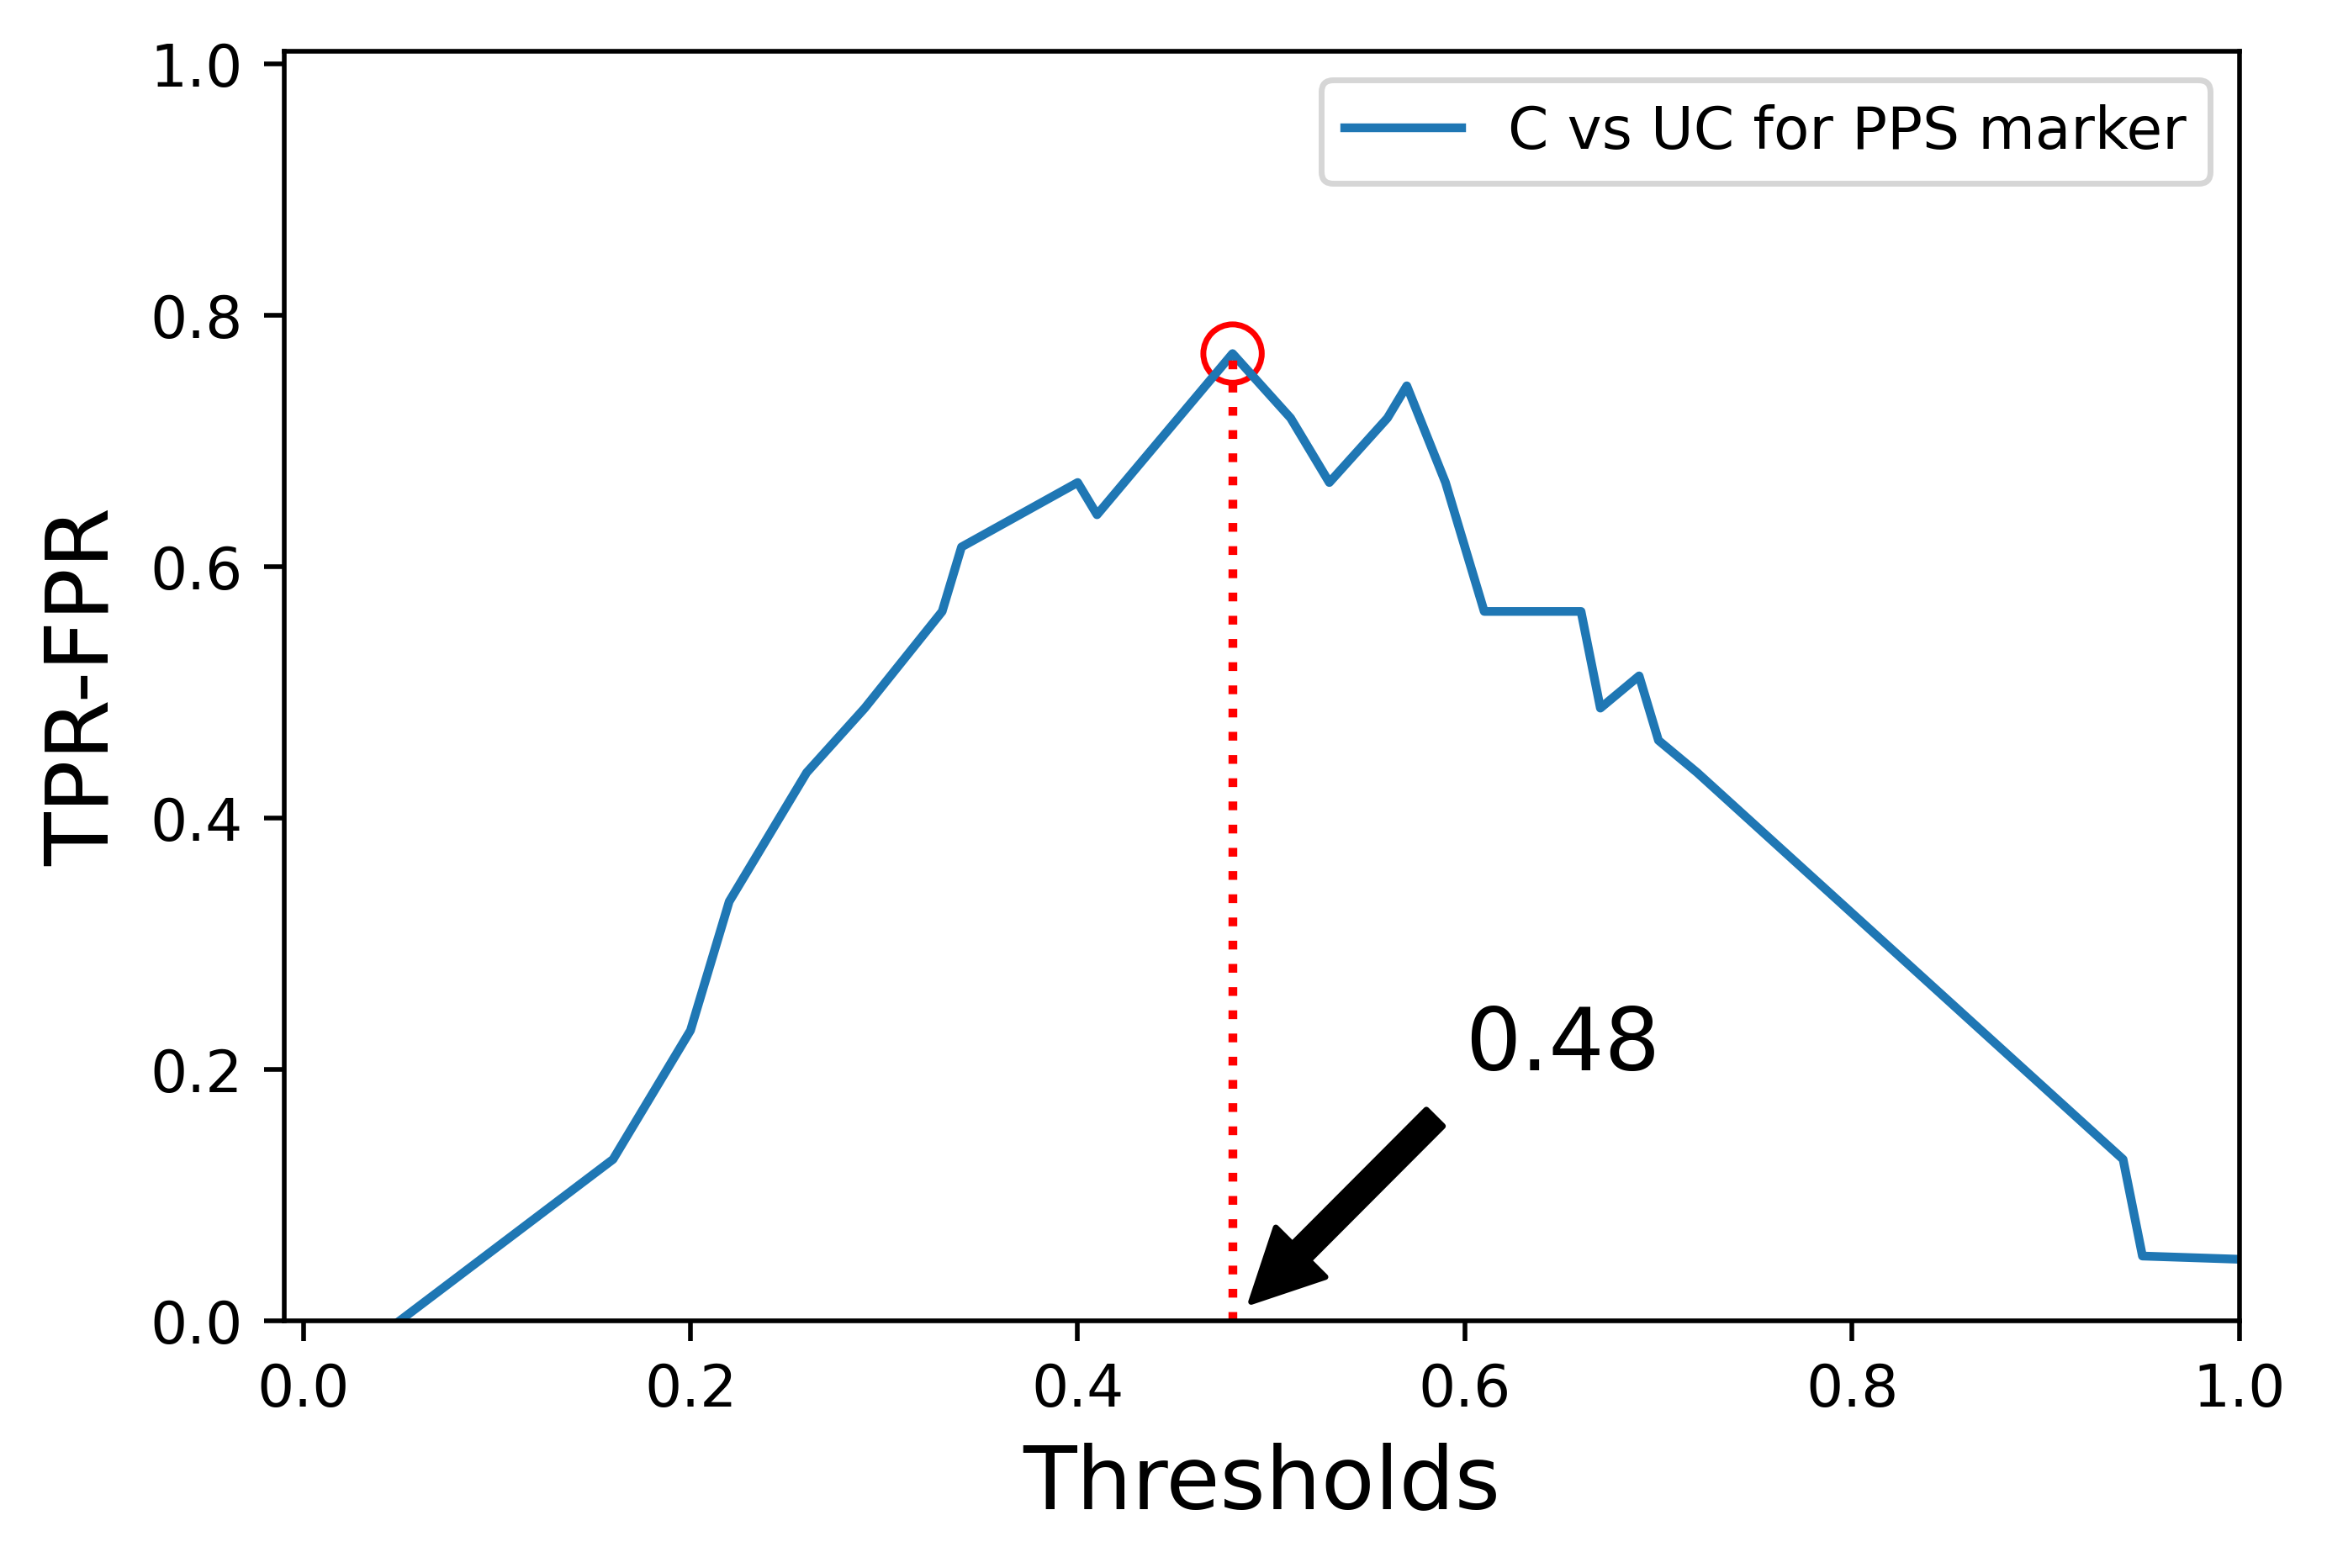

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


a = (tpr-fpr).tolist()
b = thresholds.tolist()
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(b,a,label = 'C vs UC for PPS marker')
ax.annotate('0.48',xy=(threshold,0), xytext=(0.6,0.2),arrowprops=dict(facecolor='black',shrink=0.08),fontsize=15)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])

ax.plot([threshold, threshold], [0, max(tpr-fpr)], color='red', linestyle=':')
ax.scatter(threshold,max(tpr-fpr),marker = 'o',s = 100,color = '',edgecolor='red')
plt.xlabel('Thresholds',fontsize=15)
plt.ylabel('TPR-FPR',fontsize=15)
#plt.title('ROC on Test Dataset')
plt.legend(loc="best")

In [11]:
### 1.2 EOS marker

In [12]:
##  Actual prognosis after treatment, 
##  0 for controlled and partly control, 1 for uncontrolled
y_true = [0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1
]
#Each value represents the percentage of eosinophils in the slide tissue of each patient. 
#This value is calculated by pathologists' examination of pathological slides.
y_eos = [0.615873016,
0,
0.135458167,
0.317961165,
0.001808318,
0.017632242,
0.074303406,
0.632398754,
0.006355932,
0.053658537,
0.002754821,
0.079365079,
0.046153846,
0.016666667,
0.036764706,
0.006666667,
0.021696252,
0.184035477,
0.055737705,
0.047169811,
0.014084507,
0.041152263,
0.101265823,
0.00530504,
0.007462687,
0,
0,
0.049,
0.093425606,
0,
0.069444444,
0.153846154,
0.002688172,
0,
0.608796296,
0.003333333,
0,
0,
0.647058824,
0.844036697,
0,
0,
0.486754967,
0.020833333,
0.427672956,
0.008,
0,
0.09039548,
0.017241379,
0.219565217,
0.015,
0.678,
0.360294118,
0.611044418,
0.807917889,
0.392857143,
0.854014599,
0.293963255,
0.667560322,
0.897035881,
0.673282443,
0.425149701,
0.548245614,
0.012779553,
0.025735294,
0.007751938,
0.65,
0.095490716,
0.095041322,
0.081081081,
0.131428571,
0.225806452,
0.37745098,
0,
0.060869565,
0,
0,
0.036082474]

In [13]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y_true, y_eos)

# Compute ROC area
roc_auc1 = auc(fpr1, tpr1)
print('ROC area is {0}'.format(roc_auc1))

ROC area is 0.7011834319526626


In [14]:
maxindex1 = (tpr1-fpr1).tolist().index(max(tpr1-fpr1))
threshold1 = thresholds1[maxindex1]
threshold1

0.095041322

In [15]:
max(tpr1-fpr1)

0.38461538461538464

<ipython-input-16-c52257d84f33>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(threshold1,max(tpr1-fpr1),marker = 'o',s = 100,color = '',edgecolor='red')


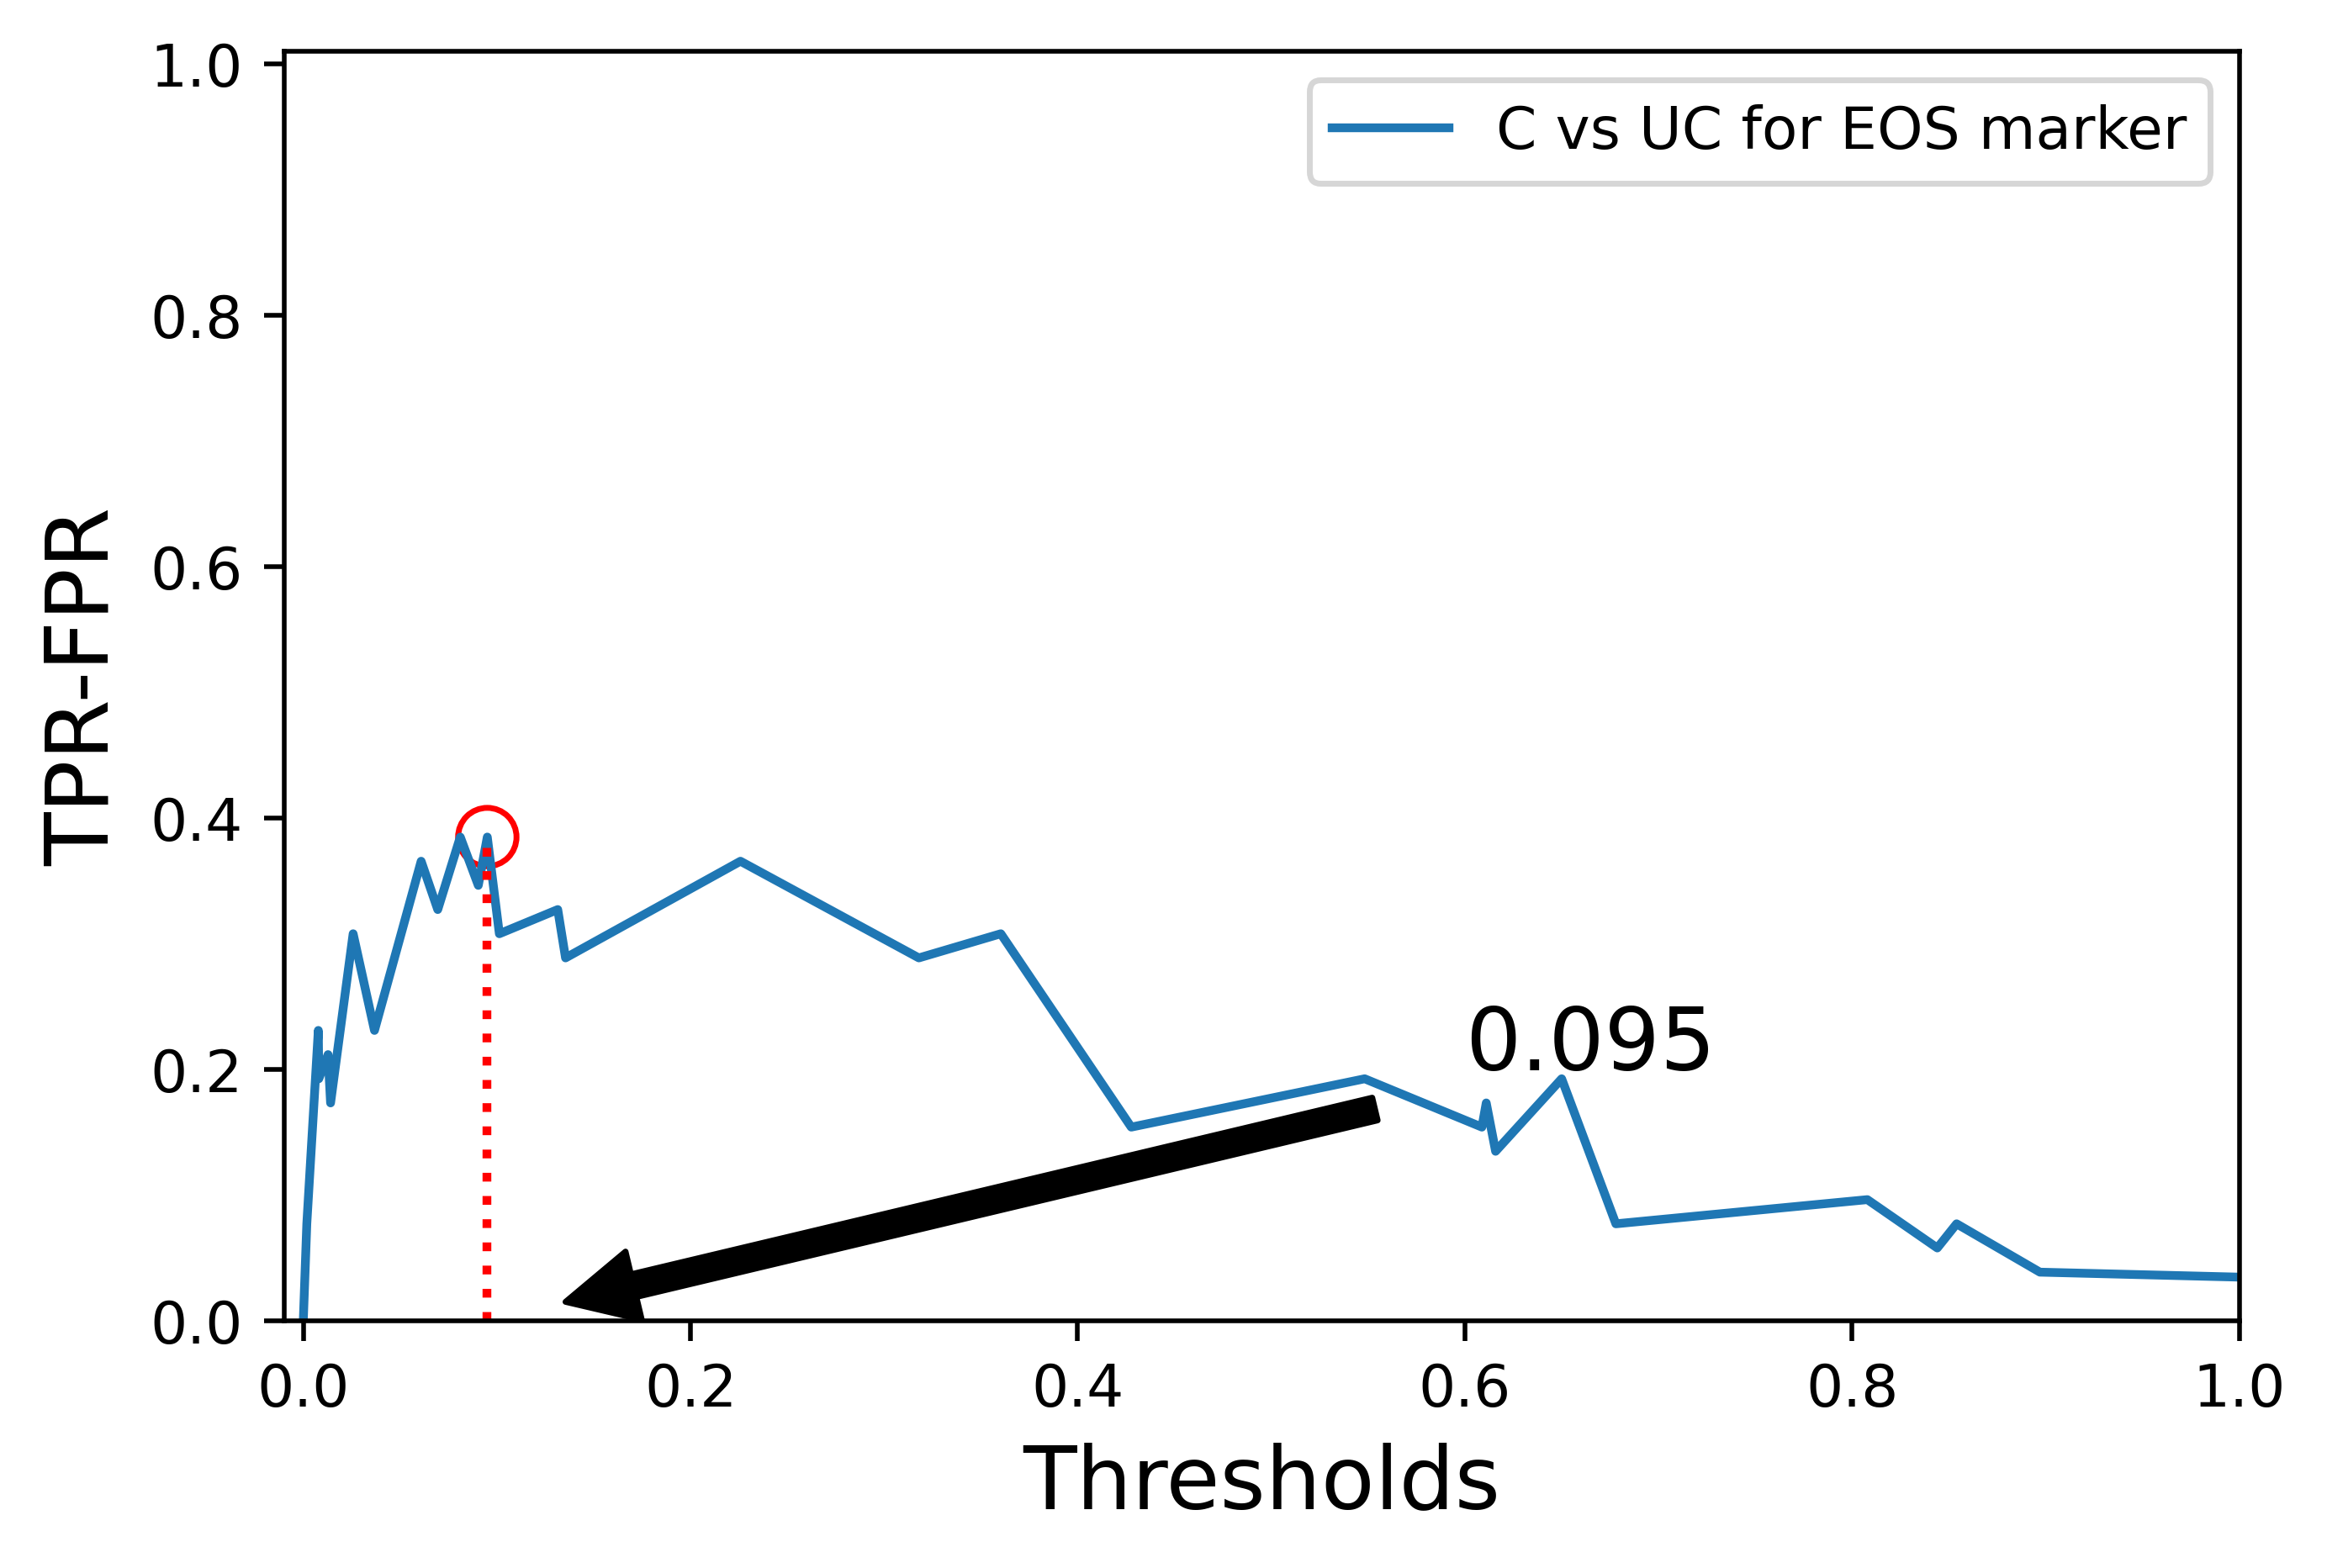

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


a = (tpr1-fpr1).tolist()
b = thresholds1.tolist()
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(b,a,label = 'C vs UC for EOS marker')
ax.annotate('0.095',xy=(threshold1,0), xytext=(0.6,0.2),arrowprops=dict(facecolor='black',shrink=0.08),fontsize=15)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])

ax.plot([threshold1, threshold1], [0, max(tpr1-fpr1)], color='red', linestyle=':')
ax.scatter(threshold1,max(tpr1-fpr1),marker = 'o',s = 100,color = '',edgecolor='red')
plt.xlabel('Thresholds',fontsize=15)
plt.ylabel('TPR-FPR',fontsize=15)
#plt.title('ROC on Test Dataset')
plt.legend(loc="best")

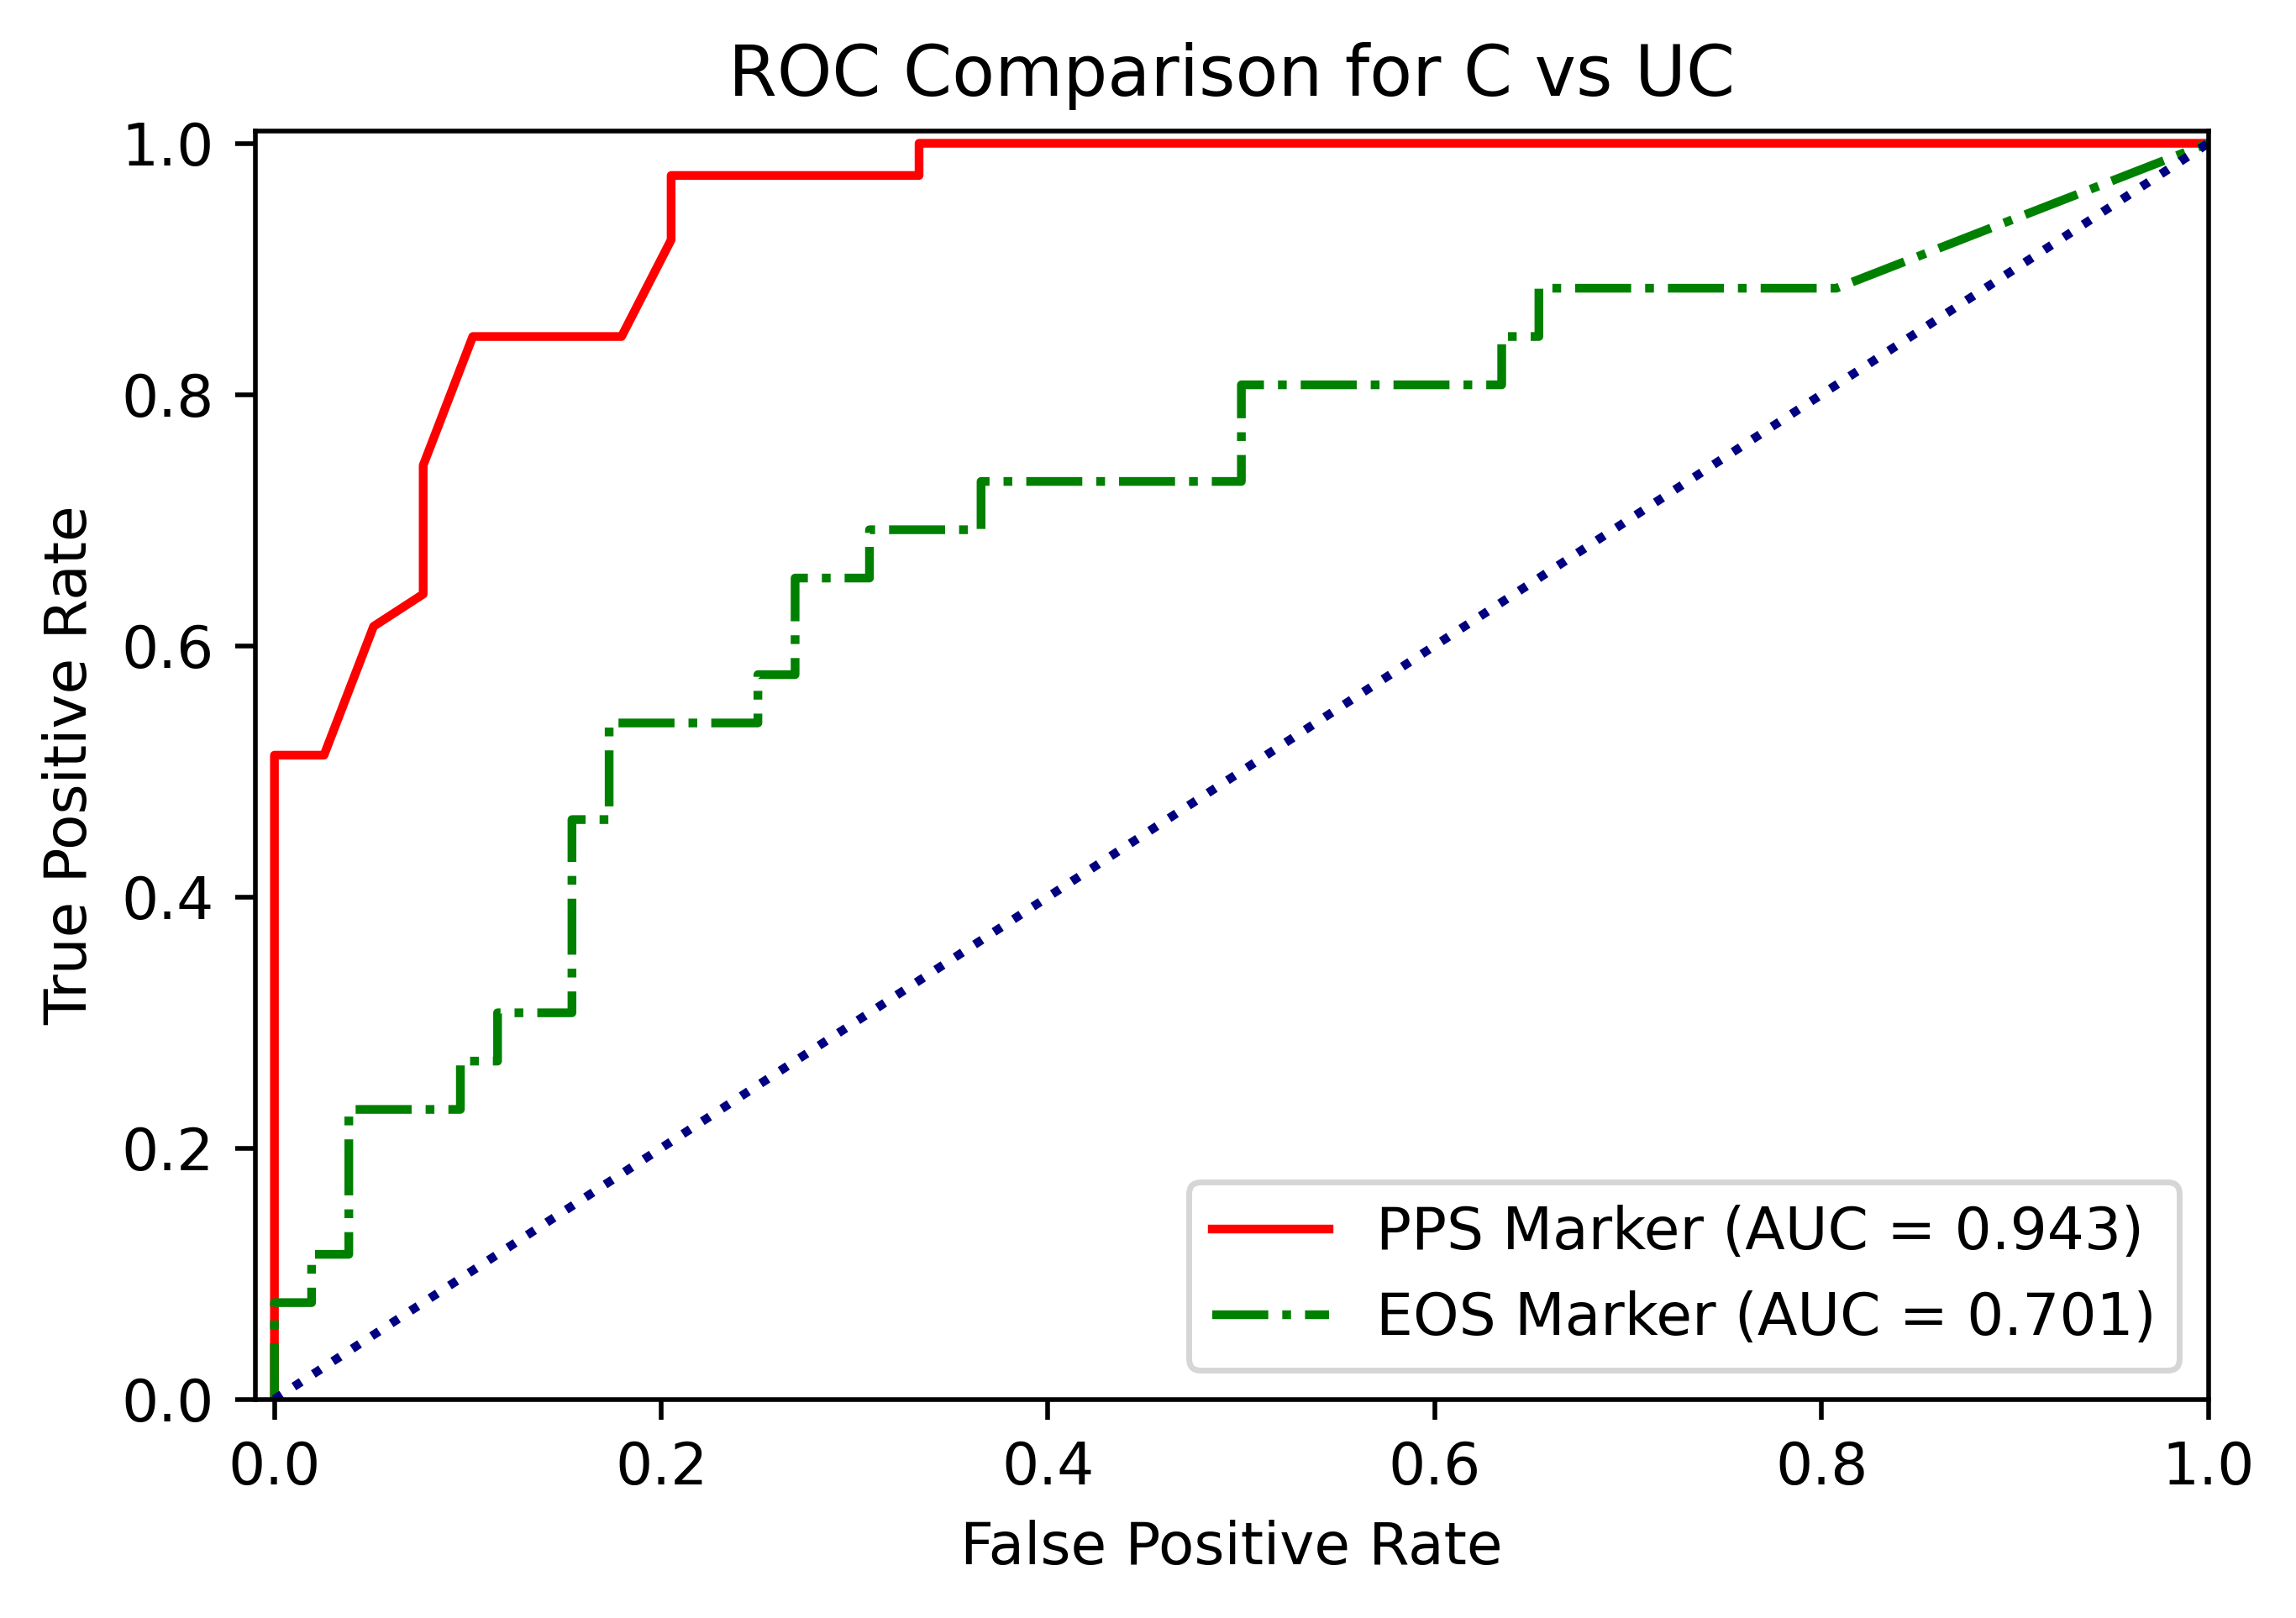

In [17]:
###  Compare the ROC of PPS and EOS


plt.figure()
plt.plot(fpr, tpr, color='red', linestyle='-',label='PPS Marker (AUC = %0.3f)' % roc_auc)
plt.plot(fpr1, tpr1, color='green',linestyle='-.', label='EOS Marker (AUC = %0.3f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle=':')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison for C vs UC')
plt.legend(loc="lower right")

In [18]:
### 2. C+PC vs NC

In [19]:
##   2.1 PPS marker
##  Actual prognosis after treatment.
##  0 for controlled and partly control, 1 for uncontrolled
y_true = [0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1
]
##  Each value represents the PPS predicted by the Ensemble model for each patient. 
##  The value is calculated according to the above code through the Ensemble model.
y_pps = [0.16,
0.57,
0.47,
0.51,
0.46,
0.09,
0.16,
0.31,
0.22,
0.19,
0.26,
0.25,
0.06,
0.2,
0.61,
0.15,
0.29,
0.21,
0.53,
0.33,
0.26,
0.34,
0.23,
0.16,
0.41,
0.05,
0.43,
0.44,
0.56,
0.11,
0.33,
0.21,
0.66,
0.53,
0.32,
0.39,
0.24,
0.67,
0.76,
0.56,
0.5,
0.41,
0.27,
0.51,
0.34,
0.47,
0.44,
0.61,
0.7,
0.53,
0.27,
0.45,
0.74,
0.65,
0.6,
0.68,
0.57,
0.39,
0.25,
0.47,
0.64,
0.4,
0.51,
0.62,
0.61,
0.64,
0.37,
0.34,
0.51,
0.51,
0.51,
0.51,
0.51,
0.51,
0.51,
0.51,
0.66,
0.74,
0.86,
0.95,
0.73,
0.48,
0.59,
0.51,
0.59,
0.57,
0.85,
0.94,
0.89,
0.66,
0.57,
0.72,
0.69,
0.51,
0.61,
0.94,
0.66,
0.74,
0.86,
0.95,
0.73,
0.48,
0.59,
0.51,
0.59,
0.57,
0.85,
0.94,
0.89,
0.66,
0.57,
0.72,
0.69,
0.7
]

In [20]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr2, tpr2, thresholds2 = roc_curve(y_true, y_pps)

# Compute ROC area
roc_auc2 = auc(fpr2, tpr2)
print('ROC area is {0}'.format(roc_auc2))

ROC area is 0.891101108033241


In [21]:
maxindex2 = (tpr2-fpr2).tolist().index(max(tpr2-fpr2))
threshold2 = thresholds2[maxindex2]
threshold2

0.57

In [22]:
max(tpr2-fpr2)

0.6578947368421053

<ipython-input-23-63e869e5f63a>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(threshold2,max(tpr2-fpr2),marker = 'o',s = 100,color = '',edgecolor='red')


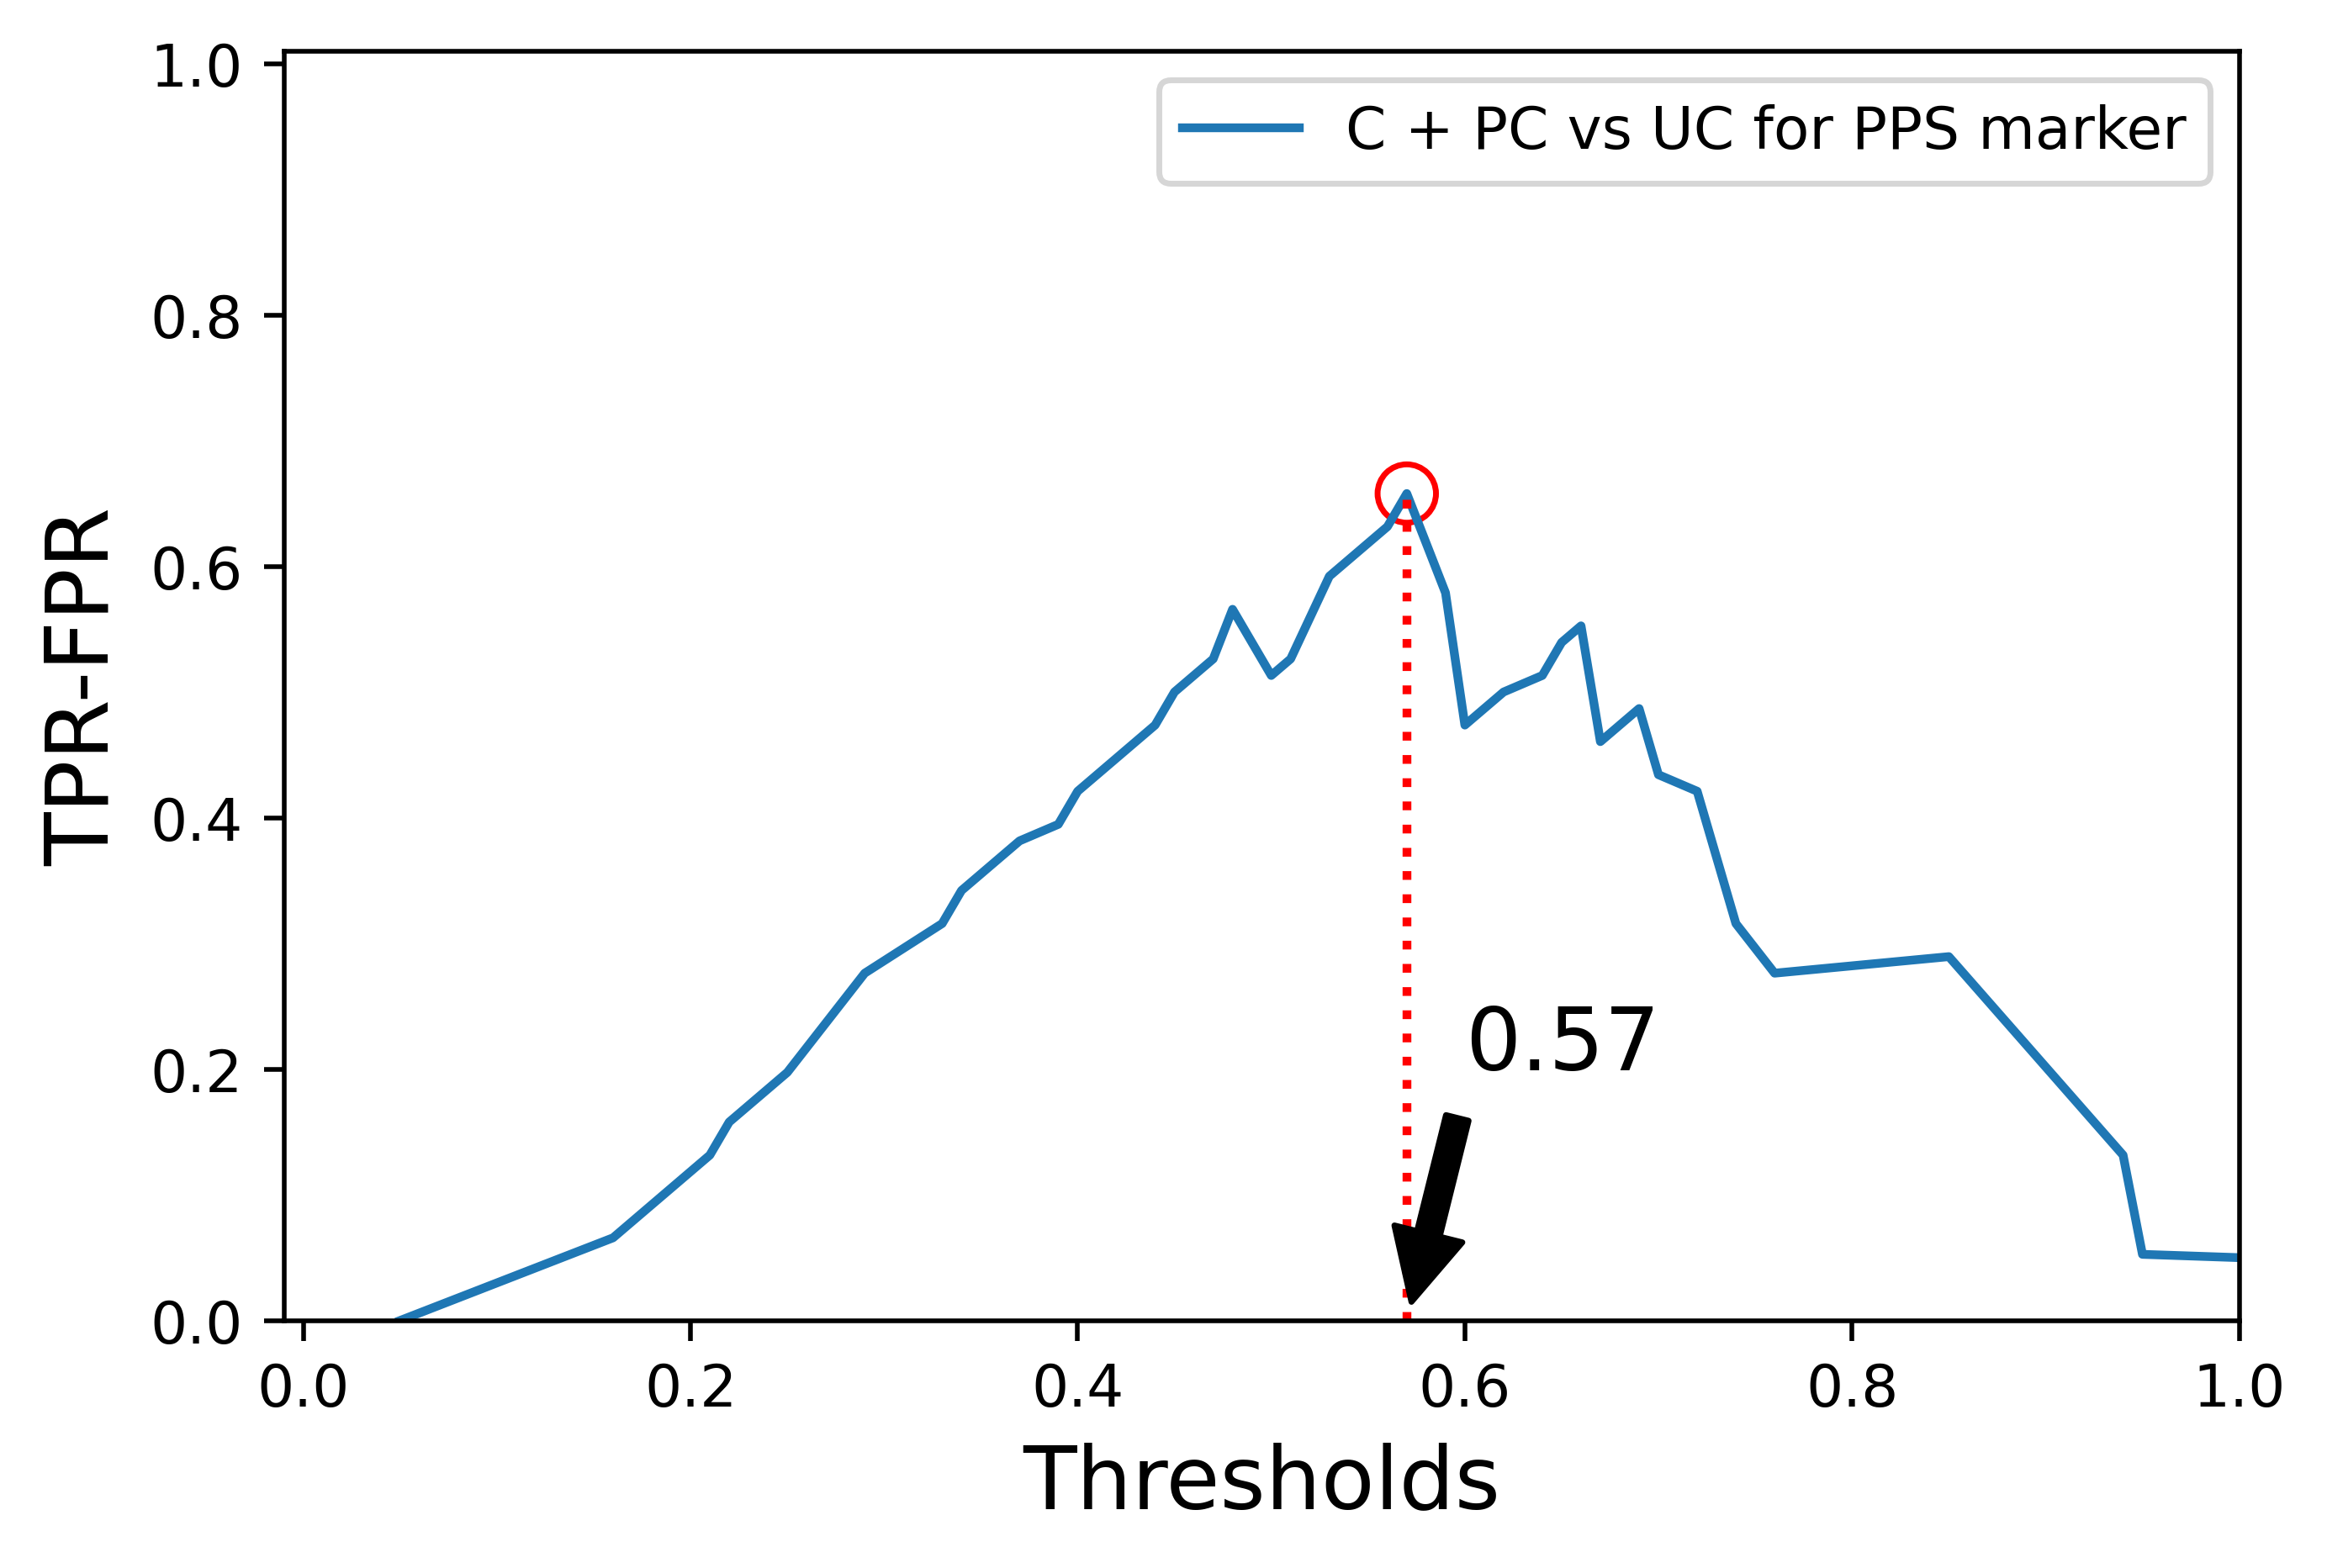

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


a = (tpr2-fpr2).tolist()
b = thresholds2.tolist()
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(b,a,label = 'C + PC vs UC for PPS marker')
ax.annotate('0.57',xy=(threshold2,0), xytext=(0.6,0.2),arrowprops=dict(facecolor='black',shrink=0.08),fontsize=15)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])

ax.plot([threshold2, threshold2], [0, max(tpr2-fpr2)], color='red', linestyle=':')
ax.scatter(threshold2,max(tpr2-fpr2),marker = 'o',s = 100,color = '',edgecolor='red')
plt.xlabel('Thresholds',fontsize=15)
plt.ylabel('TPR-FPR',fontsize=15)
#plt.title('ROC on Test Dataset')
plt.legend(loc="best")

In [24]:
### 2.2 EOS marker

In [25]:
##  Actual prognosis after treatment, 
##  0 for controlled and partly control, 1 for uncontrolled

y_true = [0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1
]
#Each value represents the percentage of eosinophils in the slide tissue of each patient. 
#This value is calculated by pathologists' examination of pathological slides.
y_eos = [0.615873016,
0,
0.135458167,
0.317961165,
0.001808318,
0.017632242,
0.074303406,
0.632398754,
0.006355932,
0.053658537,
0.002754821,
0.079365079,
0.046153846,
0.016666667,
0.036764706,
0.006666667,
0.021696252,
0.184035477,
0.055737705,
0.047169811,
0.014084507,
0.041152263,
0.101265823,
0.00530504,
0.007462687,
0,
0,
0.049,
0.093425606,
0,
0.069444444,
0.153846154,
0.002688172,
0,
0.608796296,
0.003333333,
0,
0,
0.647058824,
0.844036697,
0,
0,
0.486754967,
0.020833333,
0.427672956,
0.008,
0,
0.09039548,
0.017241379,
0.219565217,
0.015,
0.678,
0.09929078,
0.003067485,
0.253816794,
0.021791768,
0.41712204,
0.013157895,
0.012658228,
0.06993007,
0.042857143,
0.014669927,
0.137168142,
0.094339623,
0.084210526,
0.094017094,
0.318777293,
0.529661017,
0.351,
0.125,
0.089285714,
0,
0.046838407,
0.514851485,
0.001834862,
0.012578616,
0.030444965,
0.355191257,
0,
0.032679739,
0.203703704,
0.014492754,
0,
0.133093525,
0.673992674,
0.002403846,
0.599,
0.013793103,
0,
0.010695187,
0.192825112,
0.033112583,
0.375968992,
0.274,
0.008,
0.208,
0.360294118,
0.611044418,
0.807917889,
0.392857143,
0.854014599,
0.293963255,
0.667560322,
0.897035881,
0.673282443,
0.425149701,
0.548245614,
0.012779553,
0.025735294,
0.007751938,
0.65,
0.095490716,
0.095041322,
0.081081081,
0.131428571,
0.225806452,
0.37745098,
0,
0.060869565,
0,
0,
0.036082474
]

In [26]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr3, tpr3, thresholds3 = roc_curve(y_true, y_eos)

# Compute ROC area
roc_auc3 = auc(fpr3, tpr3)
print('ROC area is {0}'.format(roc_auc3))

ROC area is 0.6810897435897436


In [27]:
maxindex3 = (tpr3-fpr3).tolist().index(max(tpr3-fpr3))
threshold3 = thresholds3[maxindex3]
threshold3

0.225806452

In [28]:
max(tpr3-fpr3)

0.33012820512820507

<ipython-input-29-f443cfdb612a>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(threshold3,max(tpr3-fpr3),marker = 'o',s = 100,color = '',edgecolor='red')


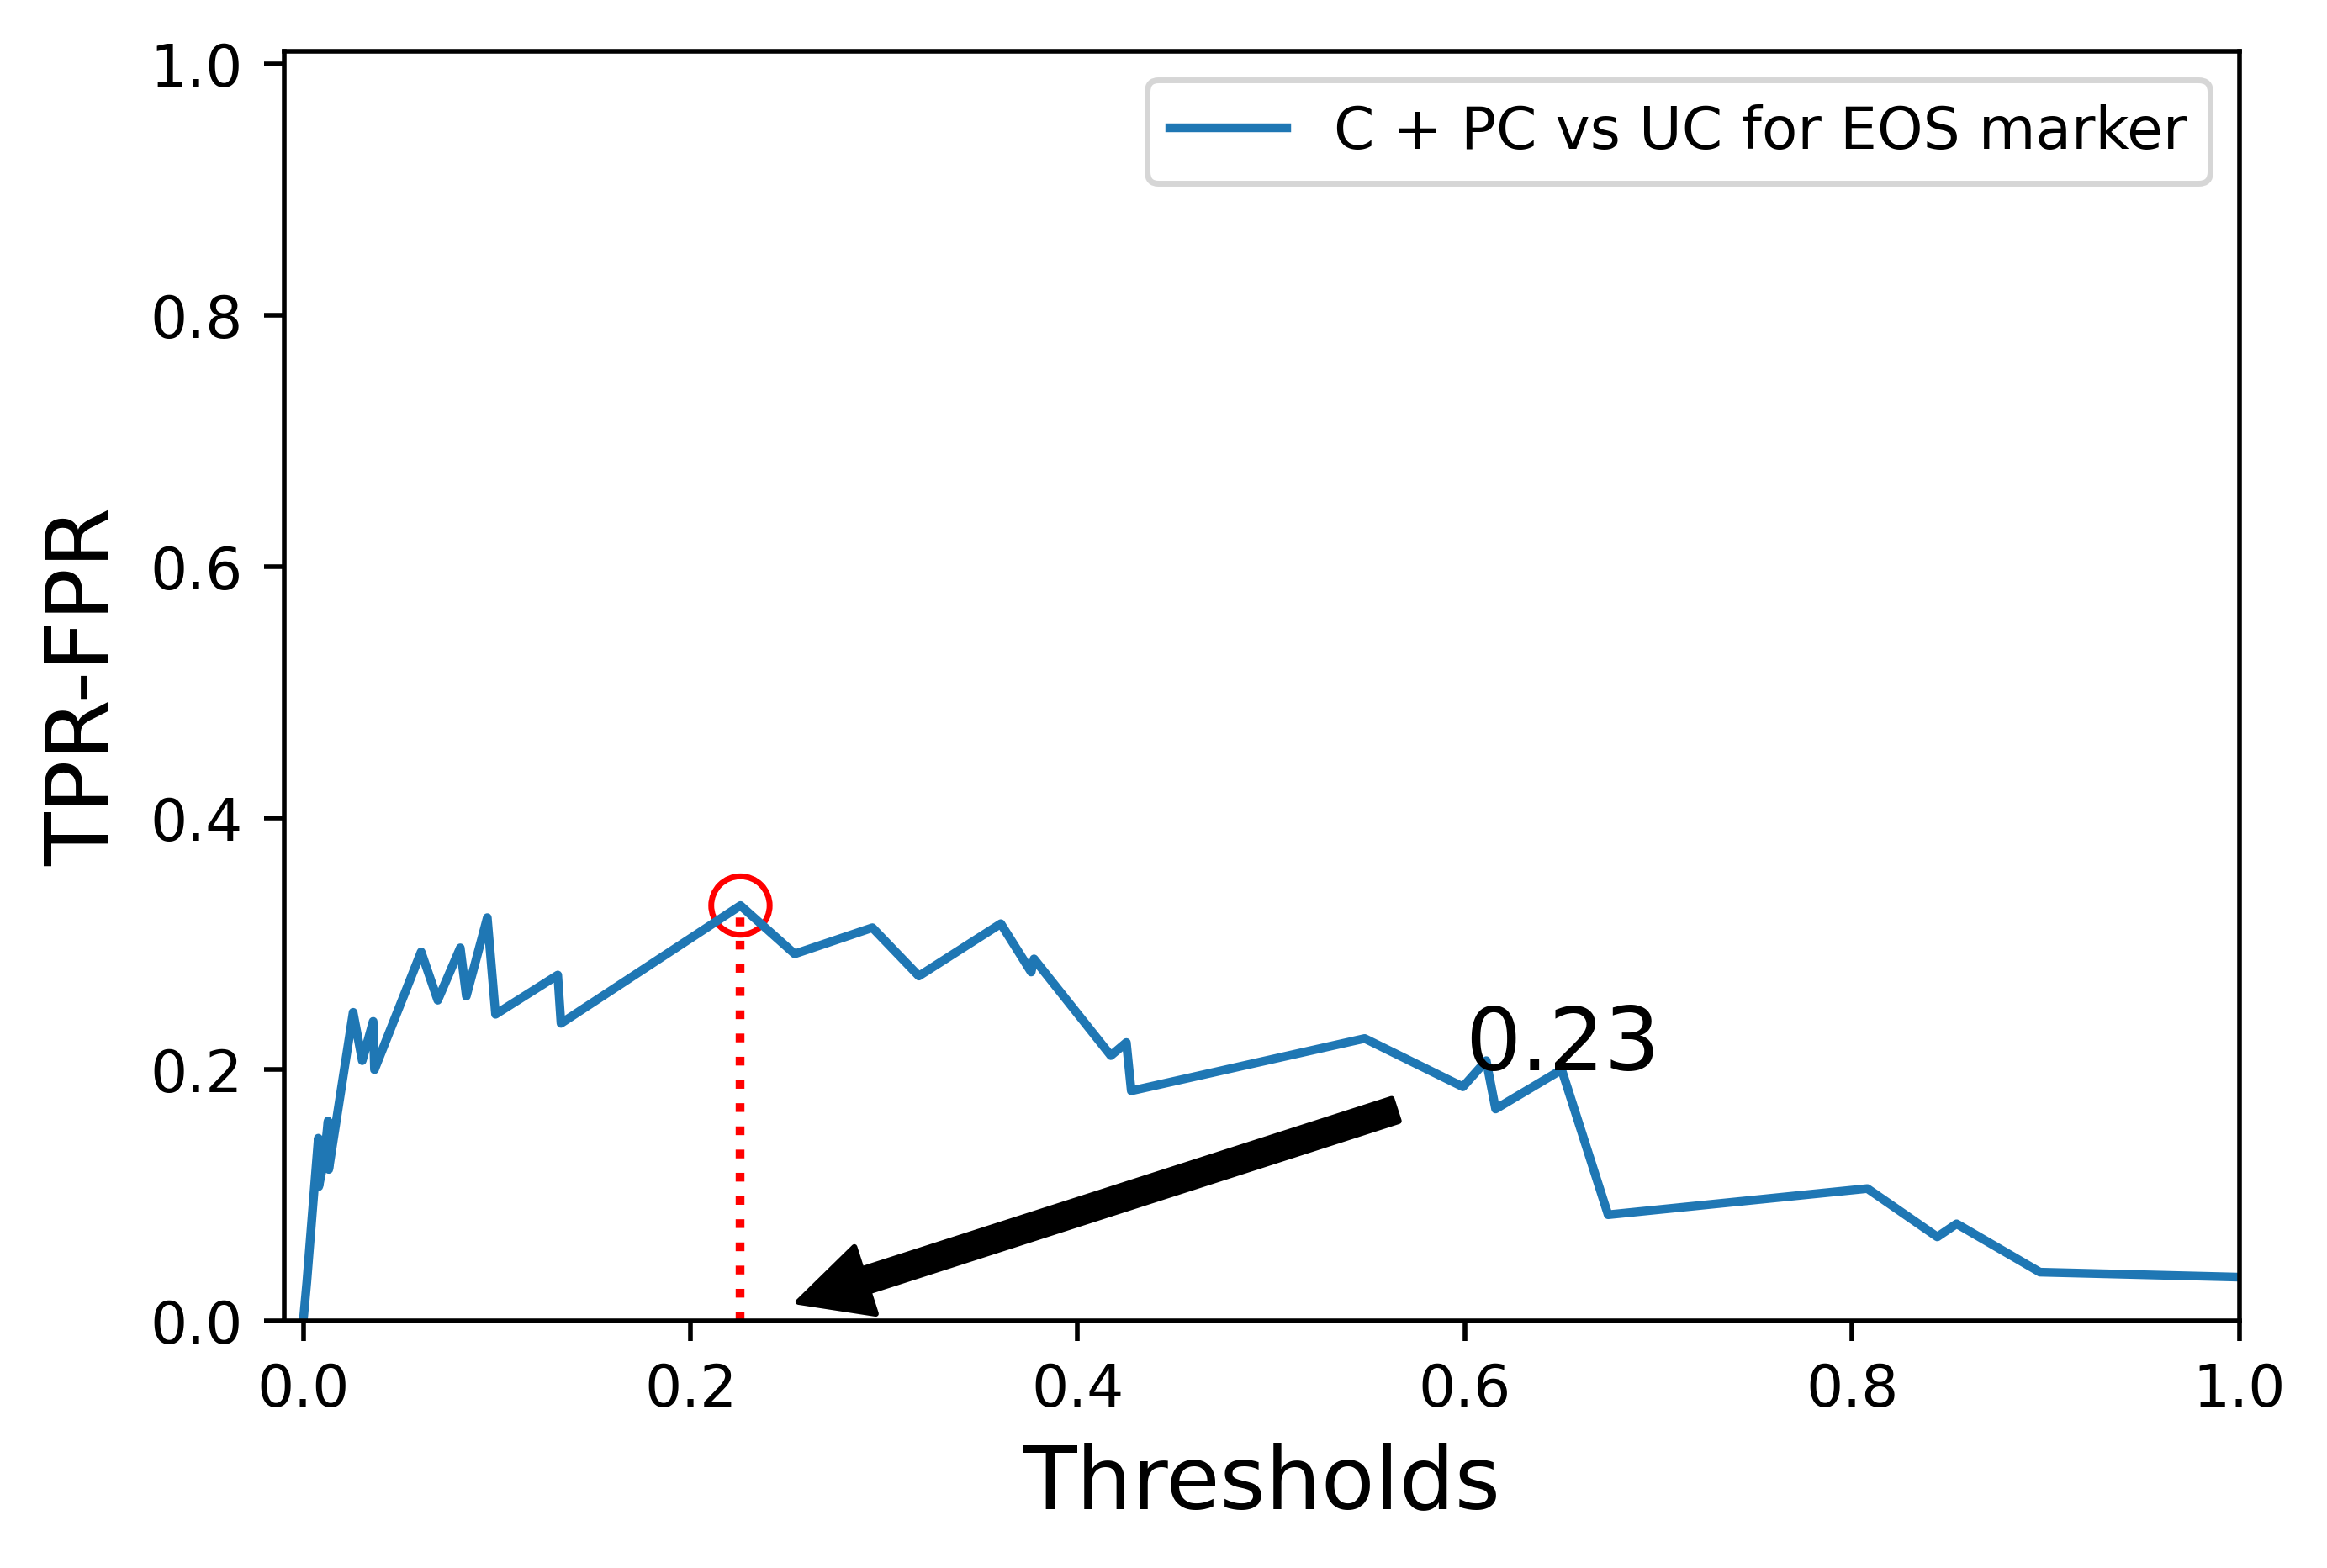

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


a = (tpr3-fpr3).tolist()
b = thresholds3.tolist()
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(b,a,label = 'C + PC vs UC for EOS marker')
ax.annotate('0.23',xy=(threshold3,0), xytext=(0.6,0.2),arrowprops=dict(facecolor='black',shrink=0.08),fontsize=15)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])

ax.plot([threshold3, threshold3], [0, max(tpr3-fpr3)], color='red', linestyle=':')
ax.scatter(threshold3,max(tpr3-fpr3),marker = 'o',s = 100,color = '',edgecolor='red')
plt.xlabel('Thresholds',fontsize=15)
plt.ylabel('TPR-FPR',fontsize=15)
#plt.title('ROC on Test Dataset')
plt.legend(loc="best")

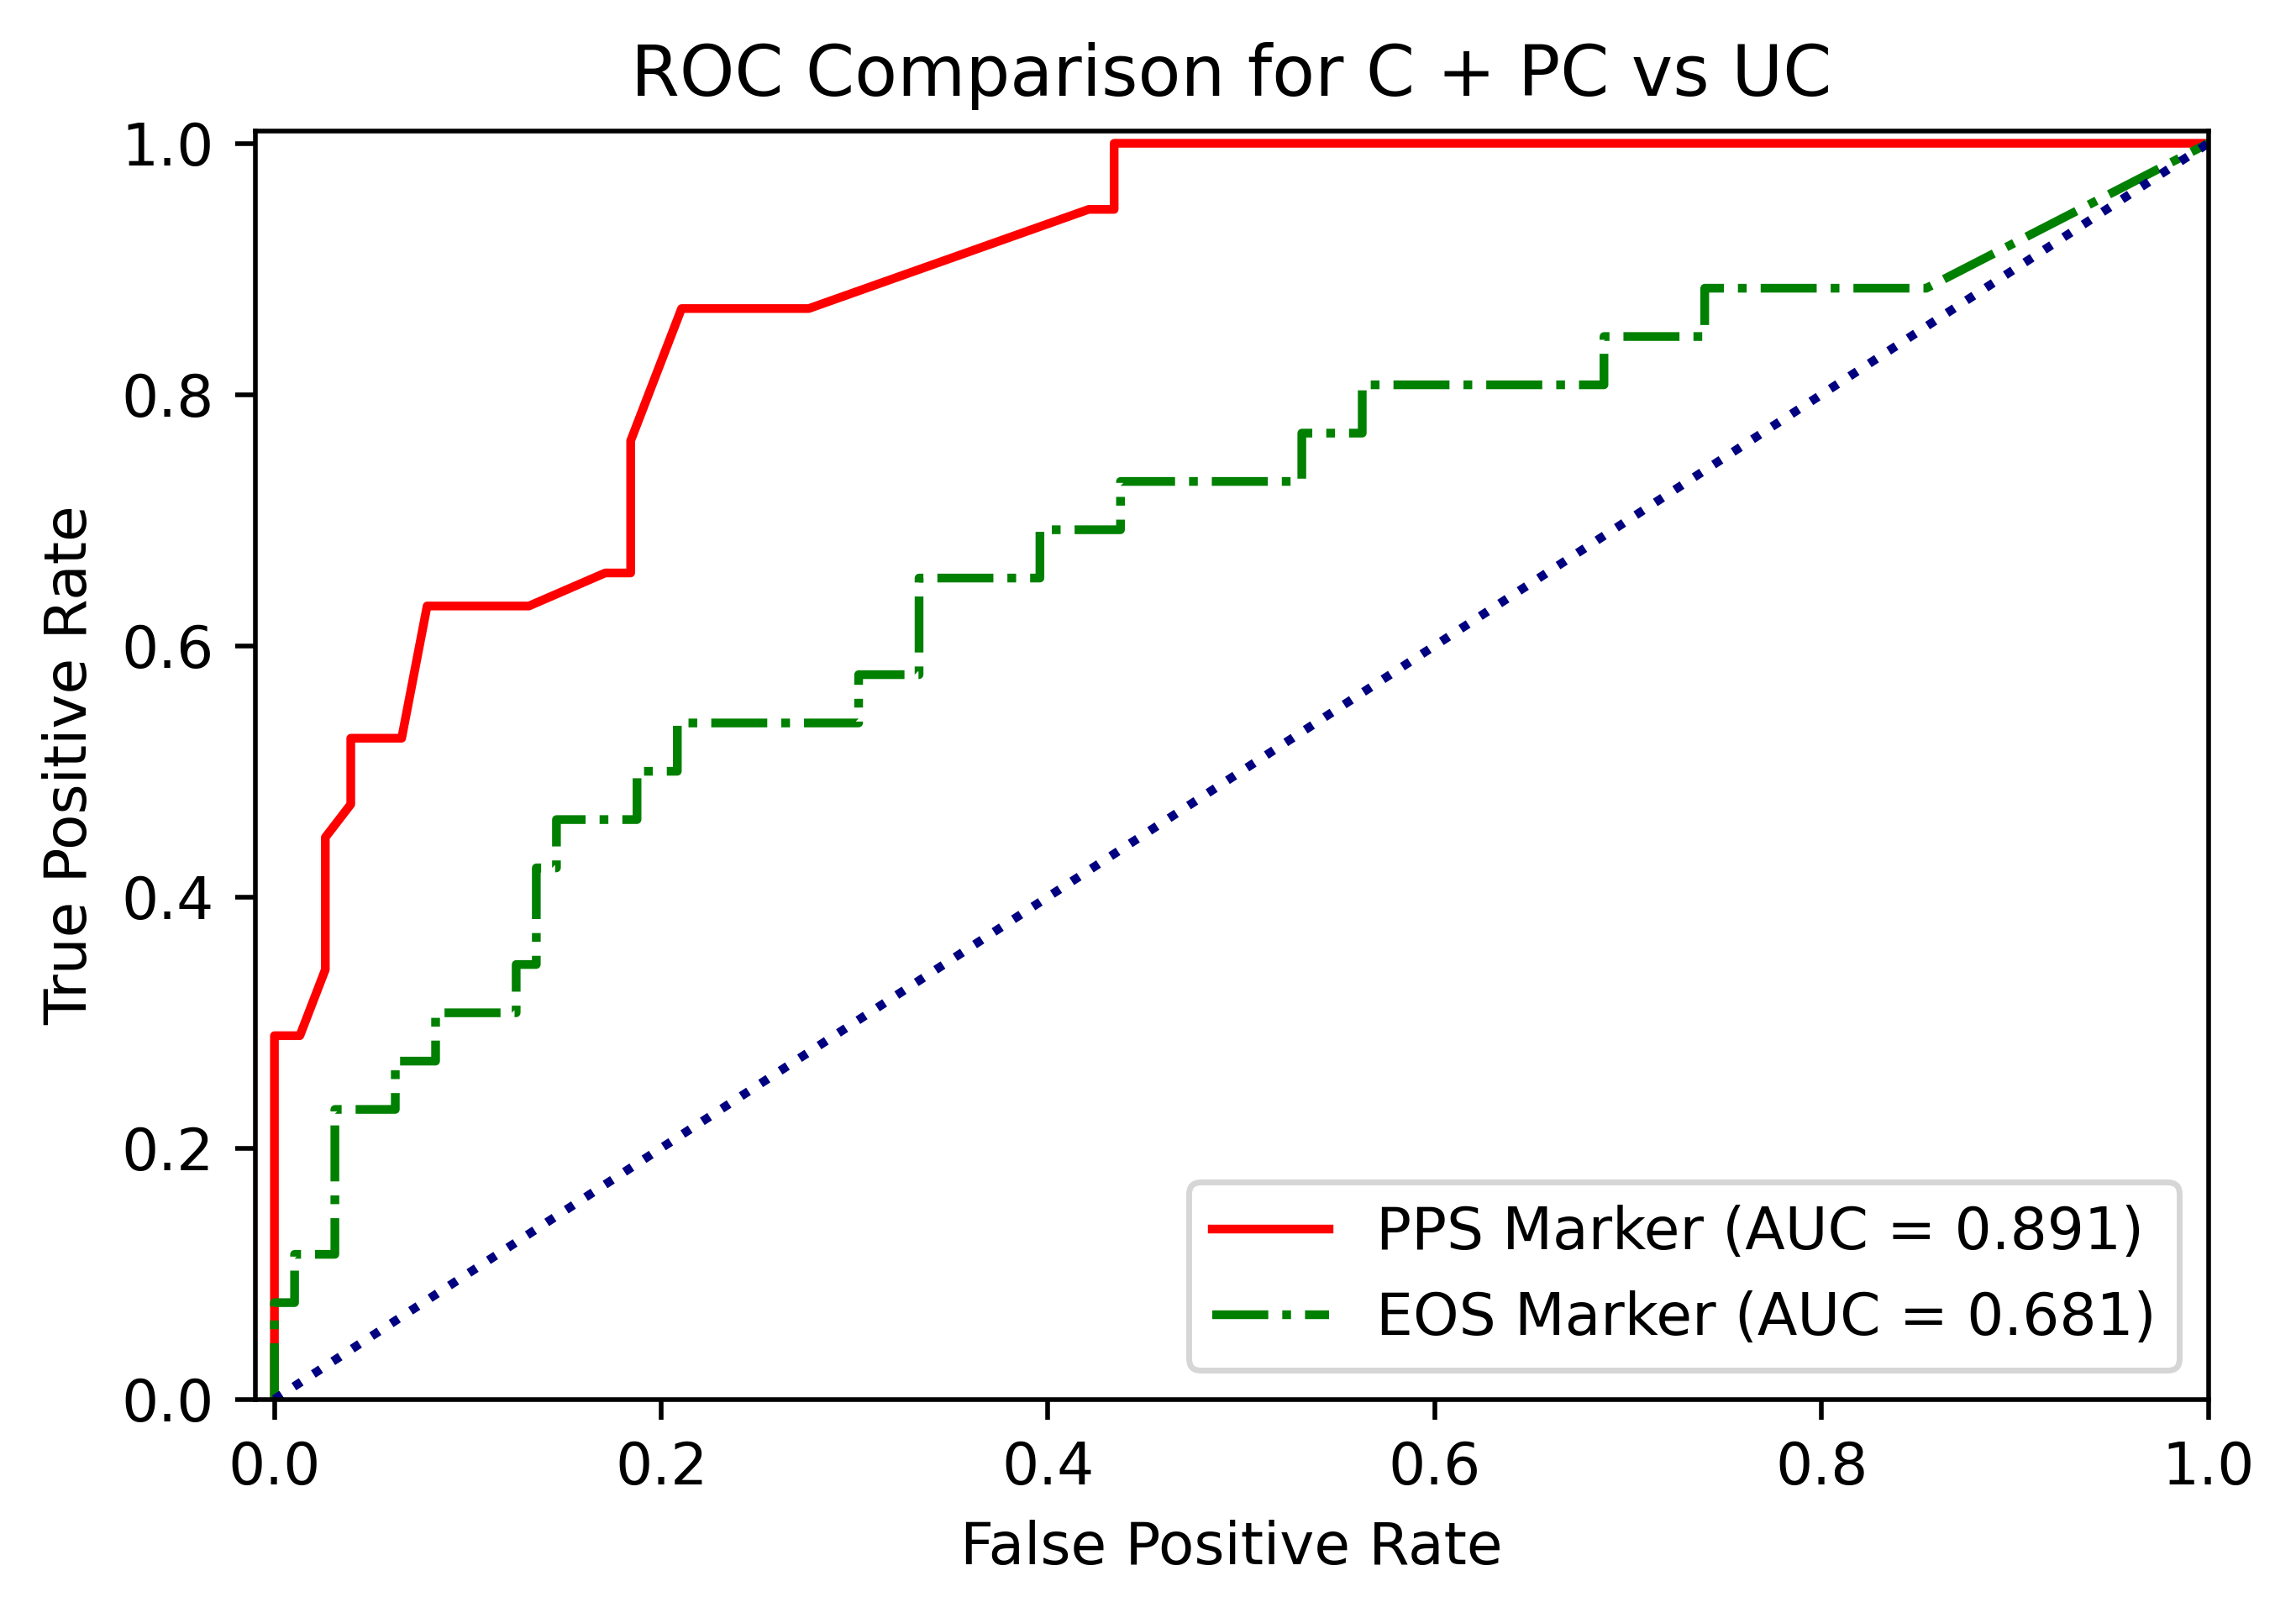

In [30]:
###  Compare the ROC of PPS and EOS


plt.figure()
plt.plot(fpr2, tpr2, color='red', linestyle='-',label='PPS Marker (AUC = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green',linestyle='-.', label='EOS Marker (AUC = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', linestyle=':')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison for C + PC vs UC')
plt.legend(loc="lower right")

In [31]:
### 3. C vs NC + PC

In [32]:
##   3.1 PPS marker
##  Actual prognosis after treatment.
##  0 for controlled, 1 for uncontrolled and partly controlled
y_true = [1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0
]
##  Each value represents the PPS predicted by the Ensemble model for each patient. 
##  The value is calculated according to the above code through the Ensemble model.
y_pps = [0.66,
0.74,
0.86,
0.95,
0.73,
0.48,
0.59,
0.51,
0.59,
0.57,
0.85,
0.94,
0.89,
0.66,
0.57,
0.72,
0.69,
0.51,
0.61,
0.94,
0.66,
0.74,
0.86,
0.95,
0.73,
0.48,
0.59,
0.51,
0.59,
0.57,
0.85,
0.94,
0.89,
0.66,
0.57,
0.72,
0.69,
0.7,
0.76,
0.56,
0.5,
0.41,
0.27,
0.51,
0.34,
0.47,
0.44,
0.61,
0.7,
0.53,
0.27,
0.45,
0.74,
0.65,
0.6,
0.68,
0.57,
0.39,
0.25,
0.47,
0.64,
0.4,
0.51,
0.62,
0.61,
0.64,
0.37,
0.34,
0.41,
0.41,
0.41,
0.31,
0.45,
0.31,
0.32,
0.40,
0.16,
0.57,
0.47,
0.51,
0.46,
0.09,
0.16,
0.31,
0.22,
0.19,
0.26,
0.25,
0.06,
0.2,
0.61,
0.15,
0.29,
0.21,
0.53,
0.33,
0.26,
0.34,
0.23,
0.16,
0.41,
0.05,
0.43,
0.44,
0.56,
0.11,
0.33,
0.21,
0.66,
0.53,
0.32,
0.39,
0.24,
0.67
]

In [33]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr4, tpr4, thresholds4 = roc_curve(y_true, y_pps)

# Compute ROC area
roc_auc4 = auc(fpr4, tpr4)
print('ROC area is {0}'.format(roc_auc4))

ROC area is 0.8535318559556787


In [34]:
maxindex4 = (tpr4-fpr4).tolist().index(max(tpr4-fpr4))
threshold4 = thresholds4[maxindex4]
threshold4

0.4

In [35]:
max(tpr4-fpr4)

0.5263157894736843

<ipython-input-36-e17da6ca04ed>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(threshold4,max(tpr4-fpr4),marker = 'o',s = 100,color = '',edgecolor='red')


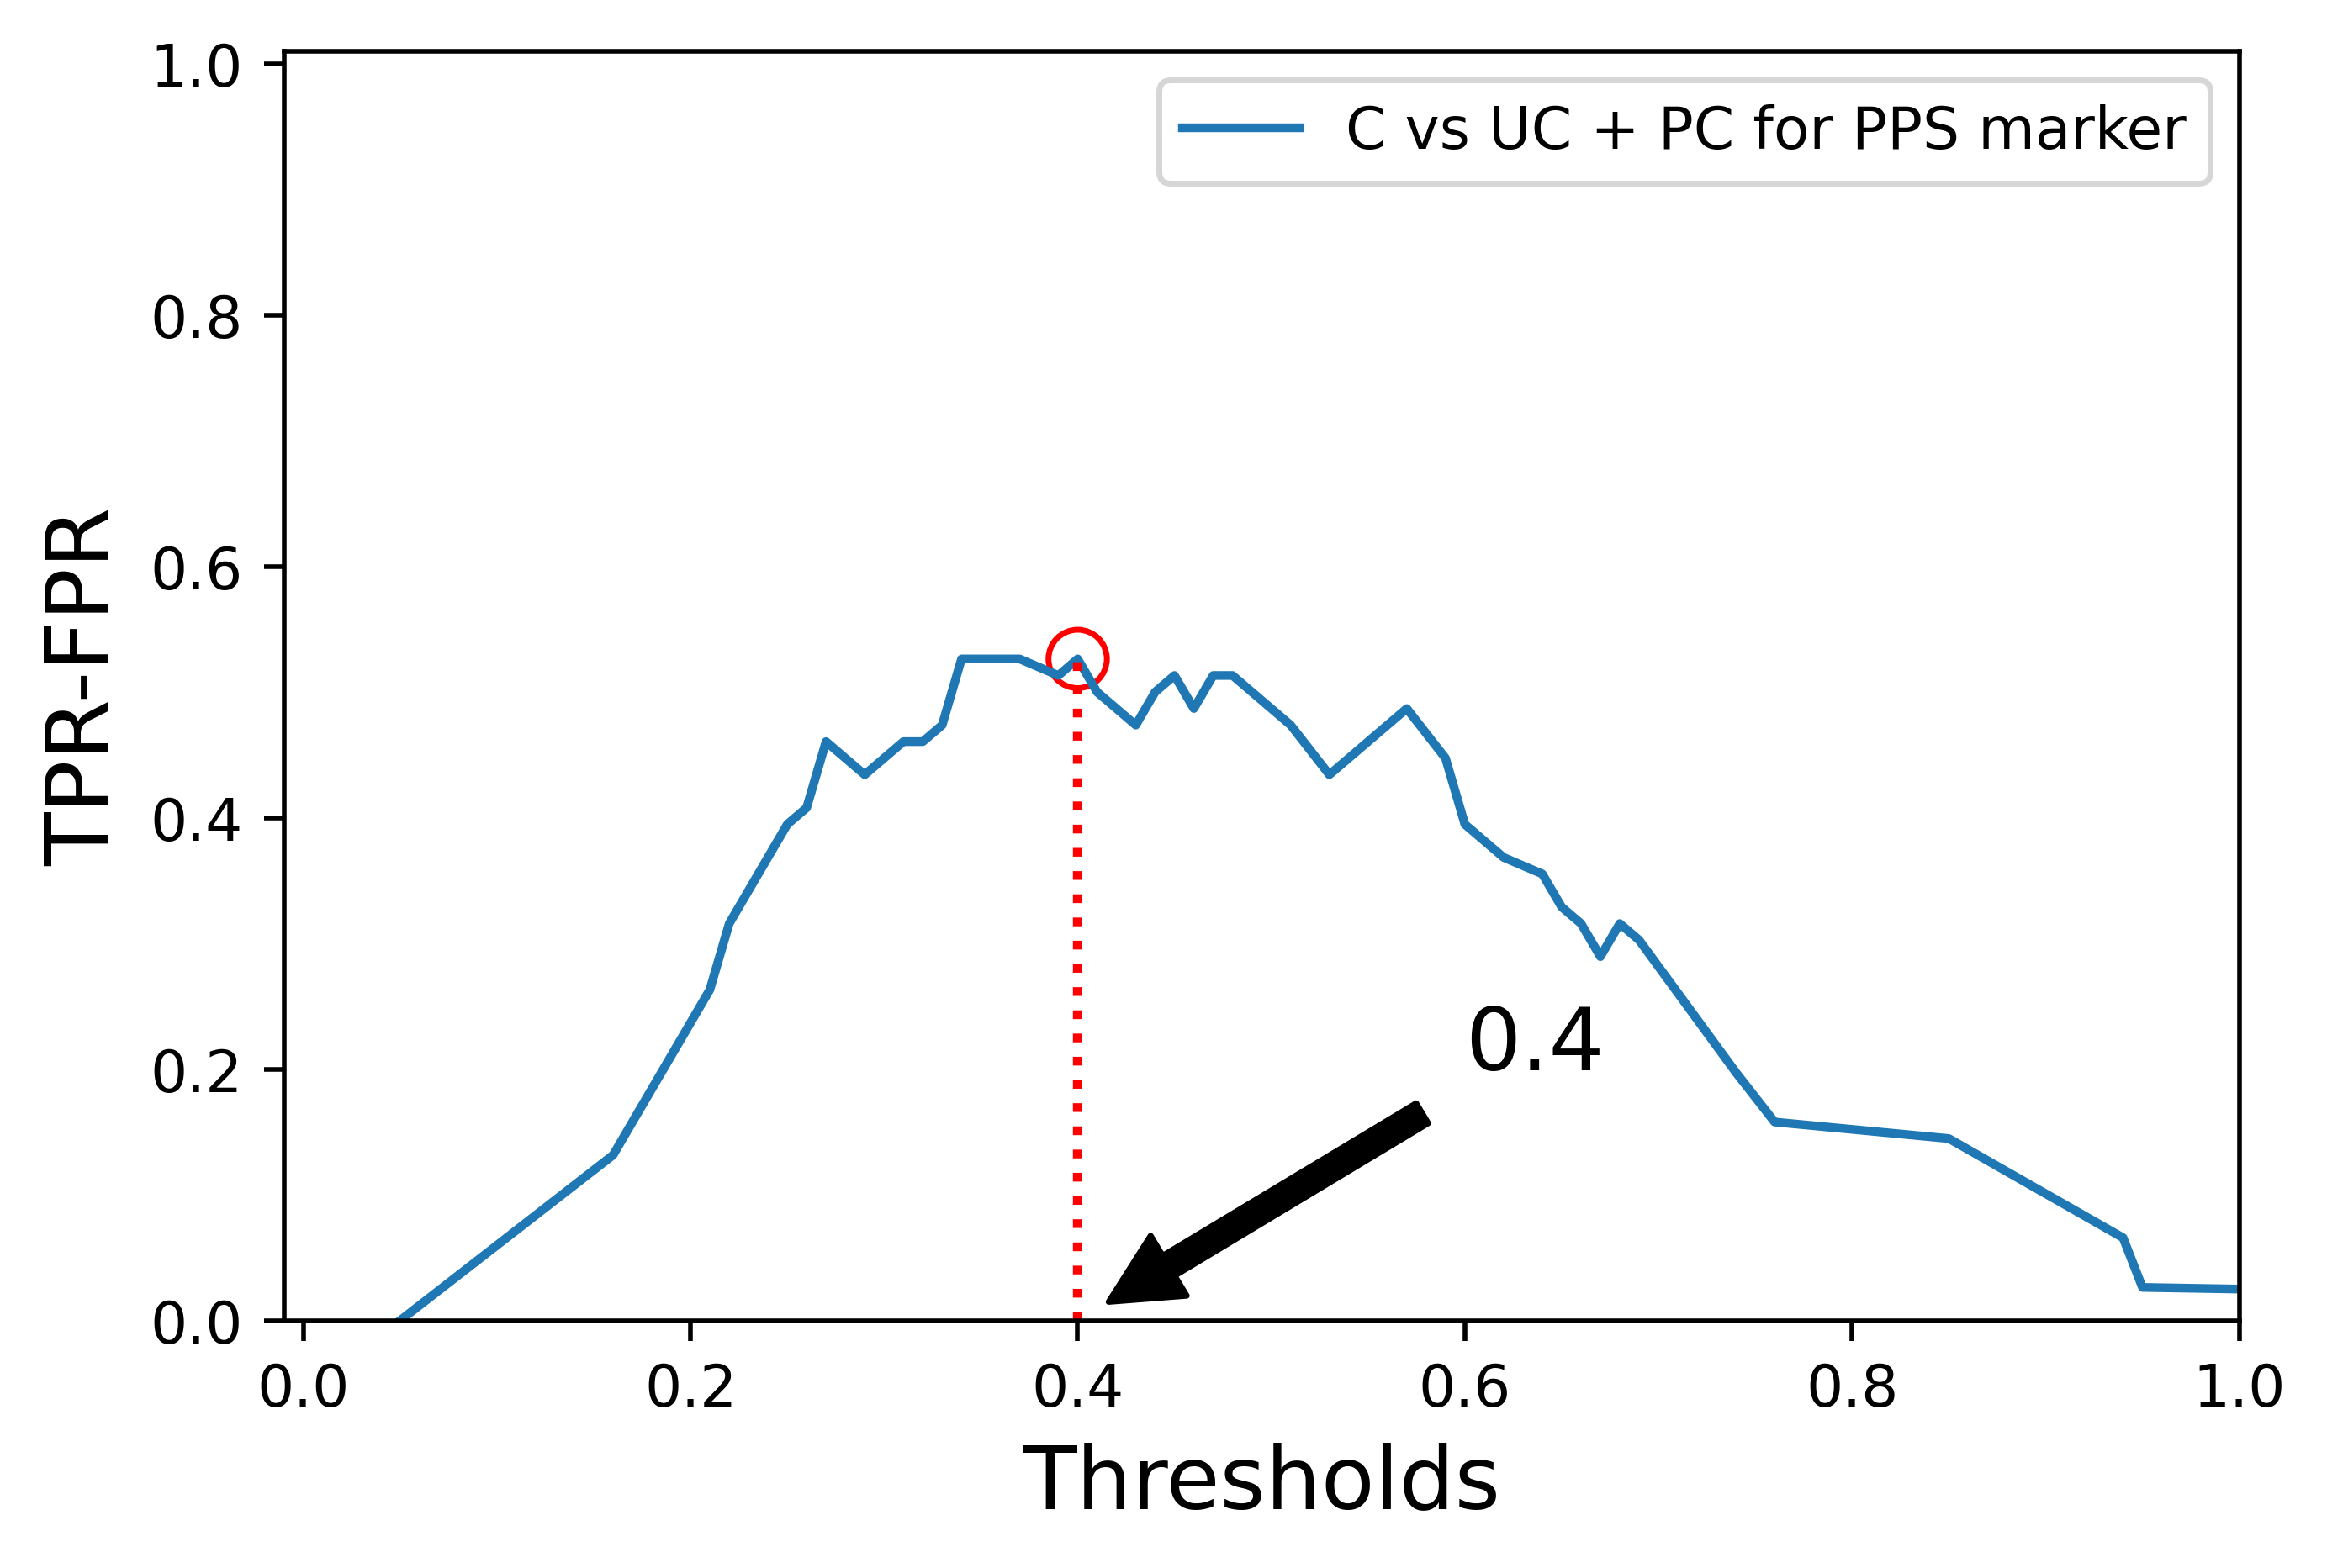

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


a = (tpr4-fpr4).tolist()
b = thresholds4.tolist()
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(b,a,label = 'C vs UC + PC for PPS marker')
ax.annotate('0.4',xy=(threshold4,0), xytext=(0.6,0.2),arrowprops=dict(facecolor='black',shrink=0.08),fontsize=15)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])

ax.plot([threshold4, threshold4], [0, max(tpr4-fpr4)], color='red', linestyle=':')
ax.scatter(threshold4,max(tpr4-fpr4),marker = 'o',s = 100,color = '',edgecolor='red')
plt.xlabel('Thresholds',fontsize=15)
plt.ylabel('TPR-FPR',fontsize=15)
#plt.title('ROC on Test Dataset')
plt.legend(loc="best")

In [37]:
### 3.2 EOS marker

In [38]:
##  Actual prognosis after treatment.
##  0 for controlled, 1 for uncontrolled and partly controlled
y_true = [0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1
]
#Each value represents the percentage of eosinophils in the slide tissue of each patient. 
#This value is calculated by pathologists' examination of pathological slides.
y_eos = [0.615873016,
0,
0.135458167,
0.317961165,
0.001808318,
0.017632242,
0.074303406,
0.632398754,
0.006355932,
0.053658537,
0.002754821,
0.079365079,
0.046153846,
0.016666667,
0.036764706,
0.006666667,
0.021696252,
0.184035477,
0.055737705,
0.047169811,
0.014084507,
0.041152263,
0.101265823,
0.00530504,
0.007462687,
0,
0,
0.049,
0.093425606,
0,
0.069444444,
0.153846154,
0.002688172,
0,
0.608796296,
0.003333333,
0,
0,
0.647058824,
0.844036697,
0,
0,
0.486754967,
0.020833333,
0.427672956,
0.008,
0,
0.09039548,
0.017241379,
0.219565217,
0.015,
0.678,
0.09929078,
0.003067485,
0.253816794,
0.021791768,
0.41712204,
0.013157895,
0.012658228,
0.06993007,
0.042857143,
0.014669927,
0.137168142,
0.094339623,
0.084210526,
0.094017094,
0.318777293,
0.529661017,
0.351,
0.125,
0.089285714,
0,
0.046838407,
0.514851485,
0.001834862,
0.012578616,
0.030444965,
0.355191257,
0,
0.032679739,
0.203703704,
0.014492754,
0,
0.133093525,
0.673992674,
0.002403846,
0.599,
0.013793103,
0,
0.010695187,
0.192825112,
0.033112583,
0.375968992,
0.274,
0.008,
0.208,
0.360294118,
0.611044418,
0.807917889,
0.392857143,
0.854014599,
0.293963255,
0.667560322,
0.897035881,
0.673282443,
0.425149701,
0.548245614,
0.012779553,
0.025735294,
0.007751938,
0.65,
0.095490716,
0.095041322,
0.081081081,
0.131428571,
0.225806452,
0.37745098,
0,
0.060869565,
0,
0,
0.036082474
]

In [39]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr5, tpr5, thresholds5 = roc_curve(y_true, y_eos)

# Compute ROC area
roc_auc5 = auc(fpr5, tpr5)
print('ROC area is {0}'.format(roc_auc5))

ROC area is 0.6251373626373626


In [40]:
maxindex5 = (tpr5-fpr5).tolist().index(max(tpr5-fpr5))
threshold5 = thresholds5[maxindex5]
threshold5

0.081081081

In [41]:
max(tpr5-fpr5)

0.2637362637362637

<ipython-input-42-f803fd309ce7>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(threshold5,max(tpr5-fpr5),marker = 'o',s = 100,color = '',edgecolor='red')


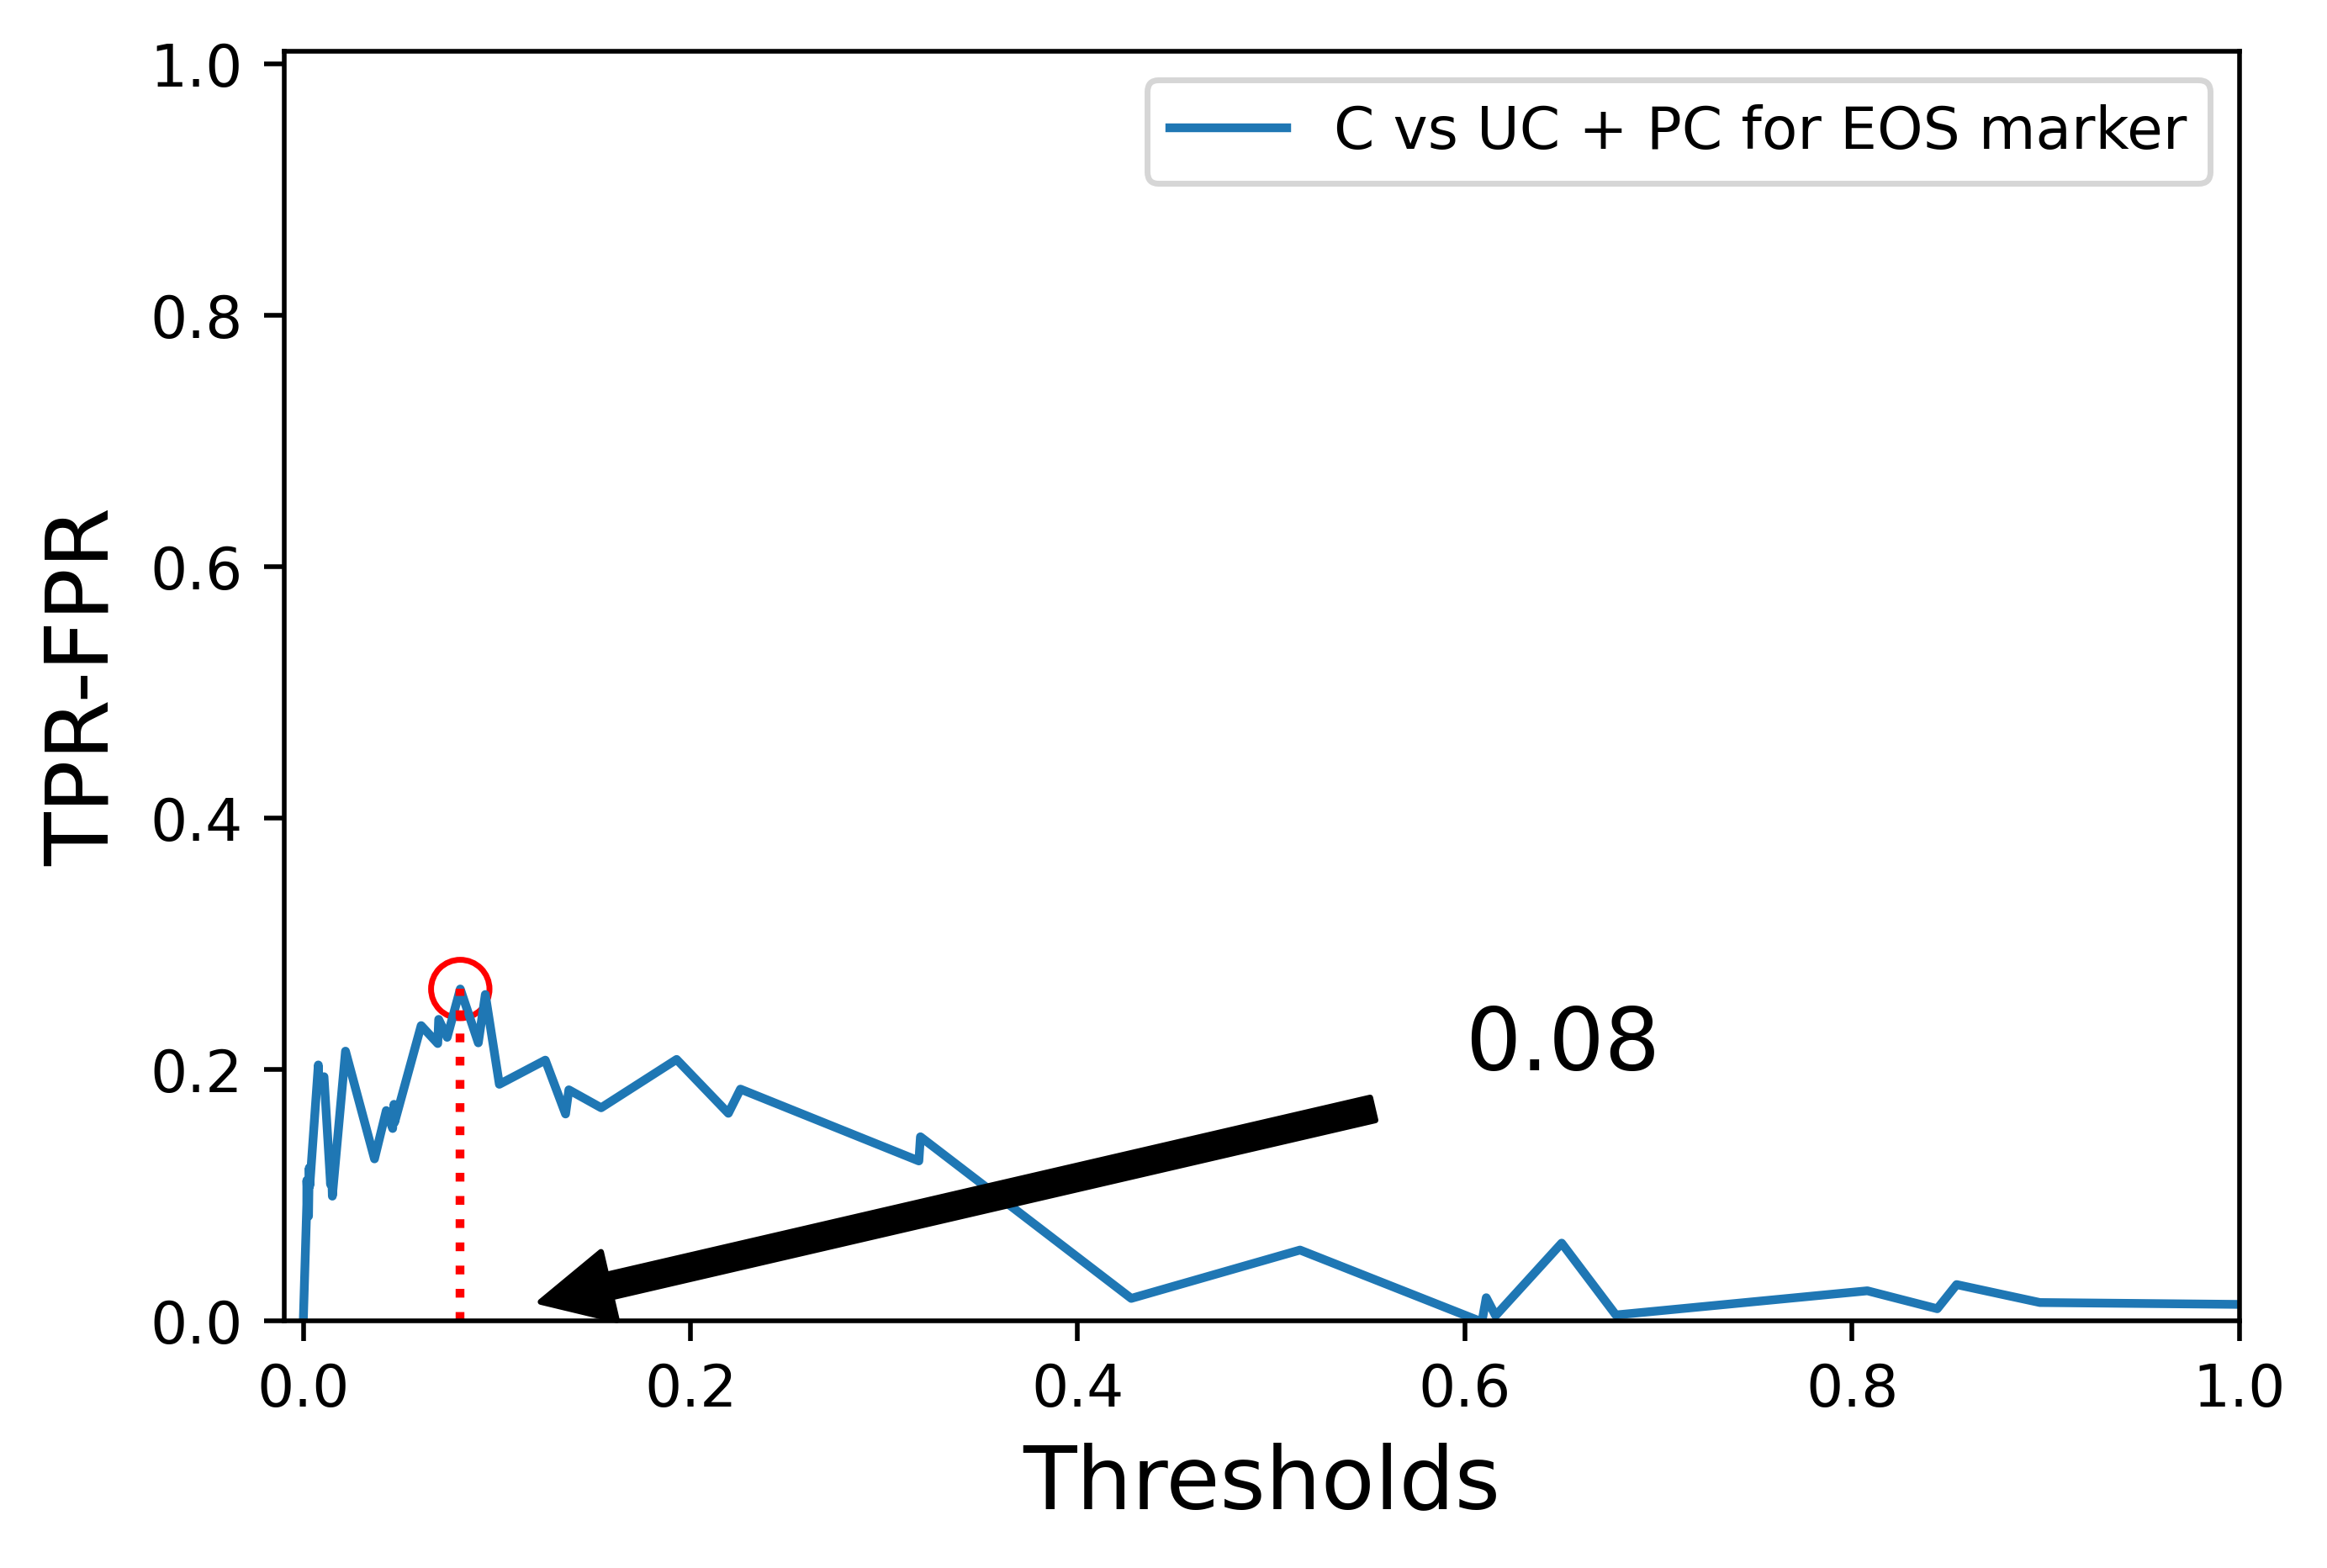

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


a = (tpr5-fpr5).tolist()
b = thresholds5.tolist()
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(b,a,label = 'C vs UC + PC for EOS marker')
ax.annotate('0.08',xy=(threshold5,0), xytext=(0.6,0.2),arrowprops=dict(facecolor='black',shrink=0.08),fontsize=15)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])

ax.plot([threshold5, threshold5], [0, max(tpr5-fpr5)], color='red', linestyle=':')
ax.scatter(threshold5,max(tpr5-fpr5),marker = 'o',s = 100,color = '',edgecolor='red')
plt.xlabel('Thresholds',fontsize=15)
plt.ylabel('TPR-FPR',fontsize=15)
#plt.title('ROC on Test Dataset')
plt.legend(loc="best")

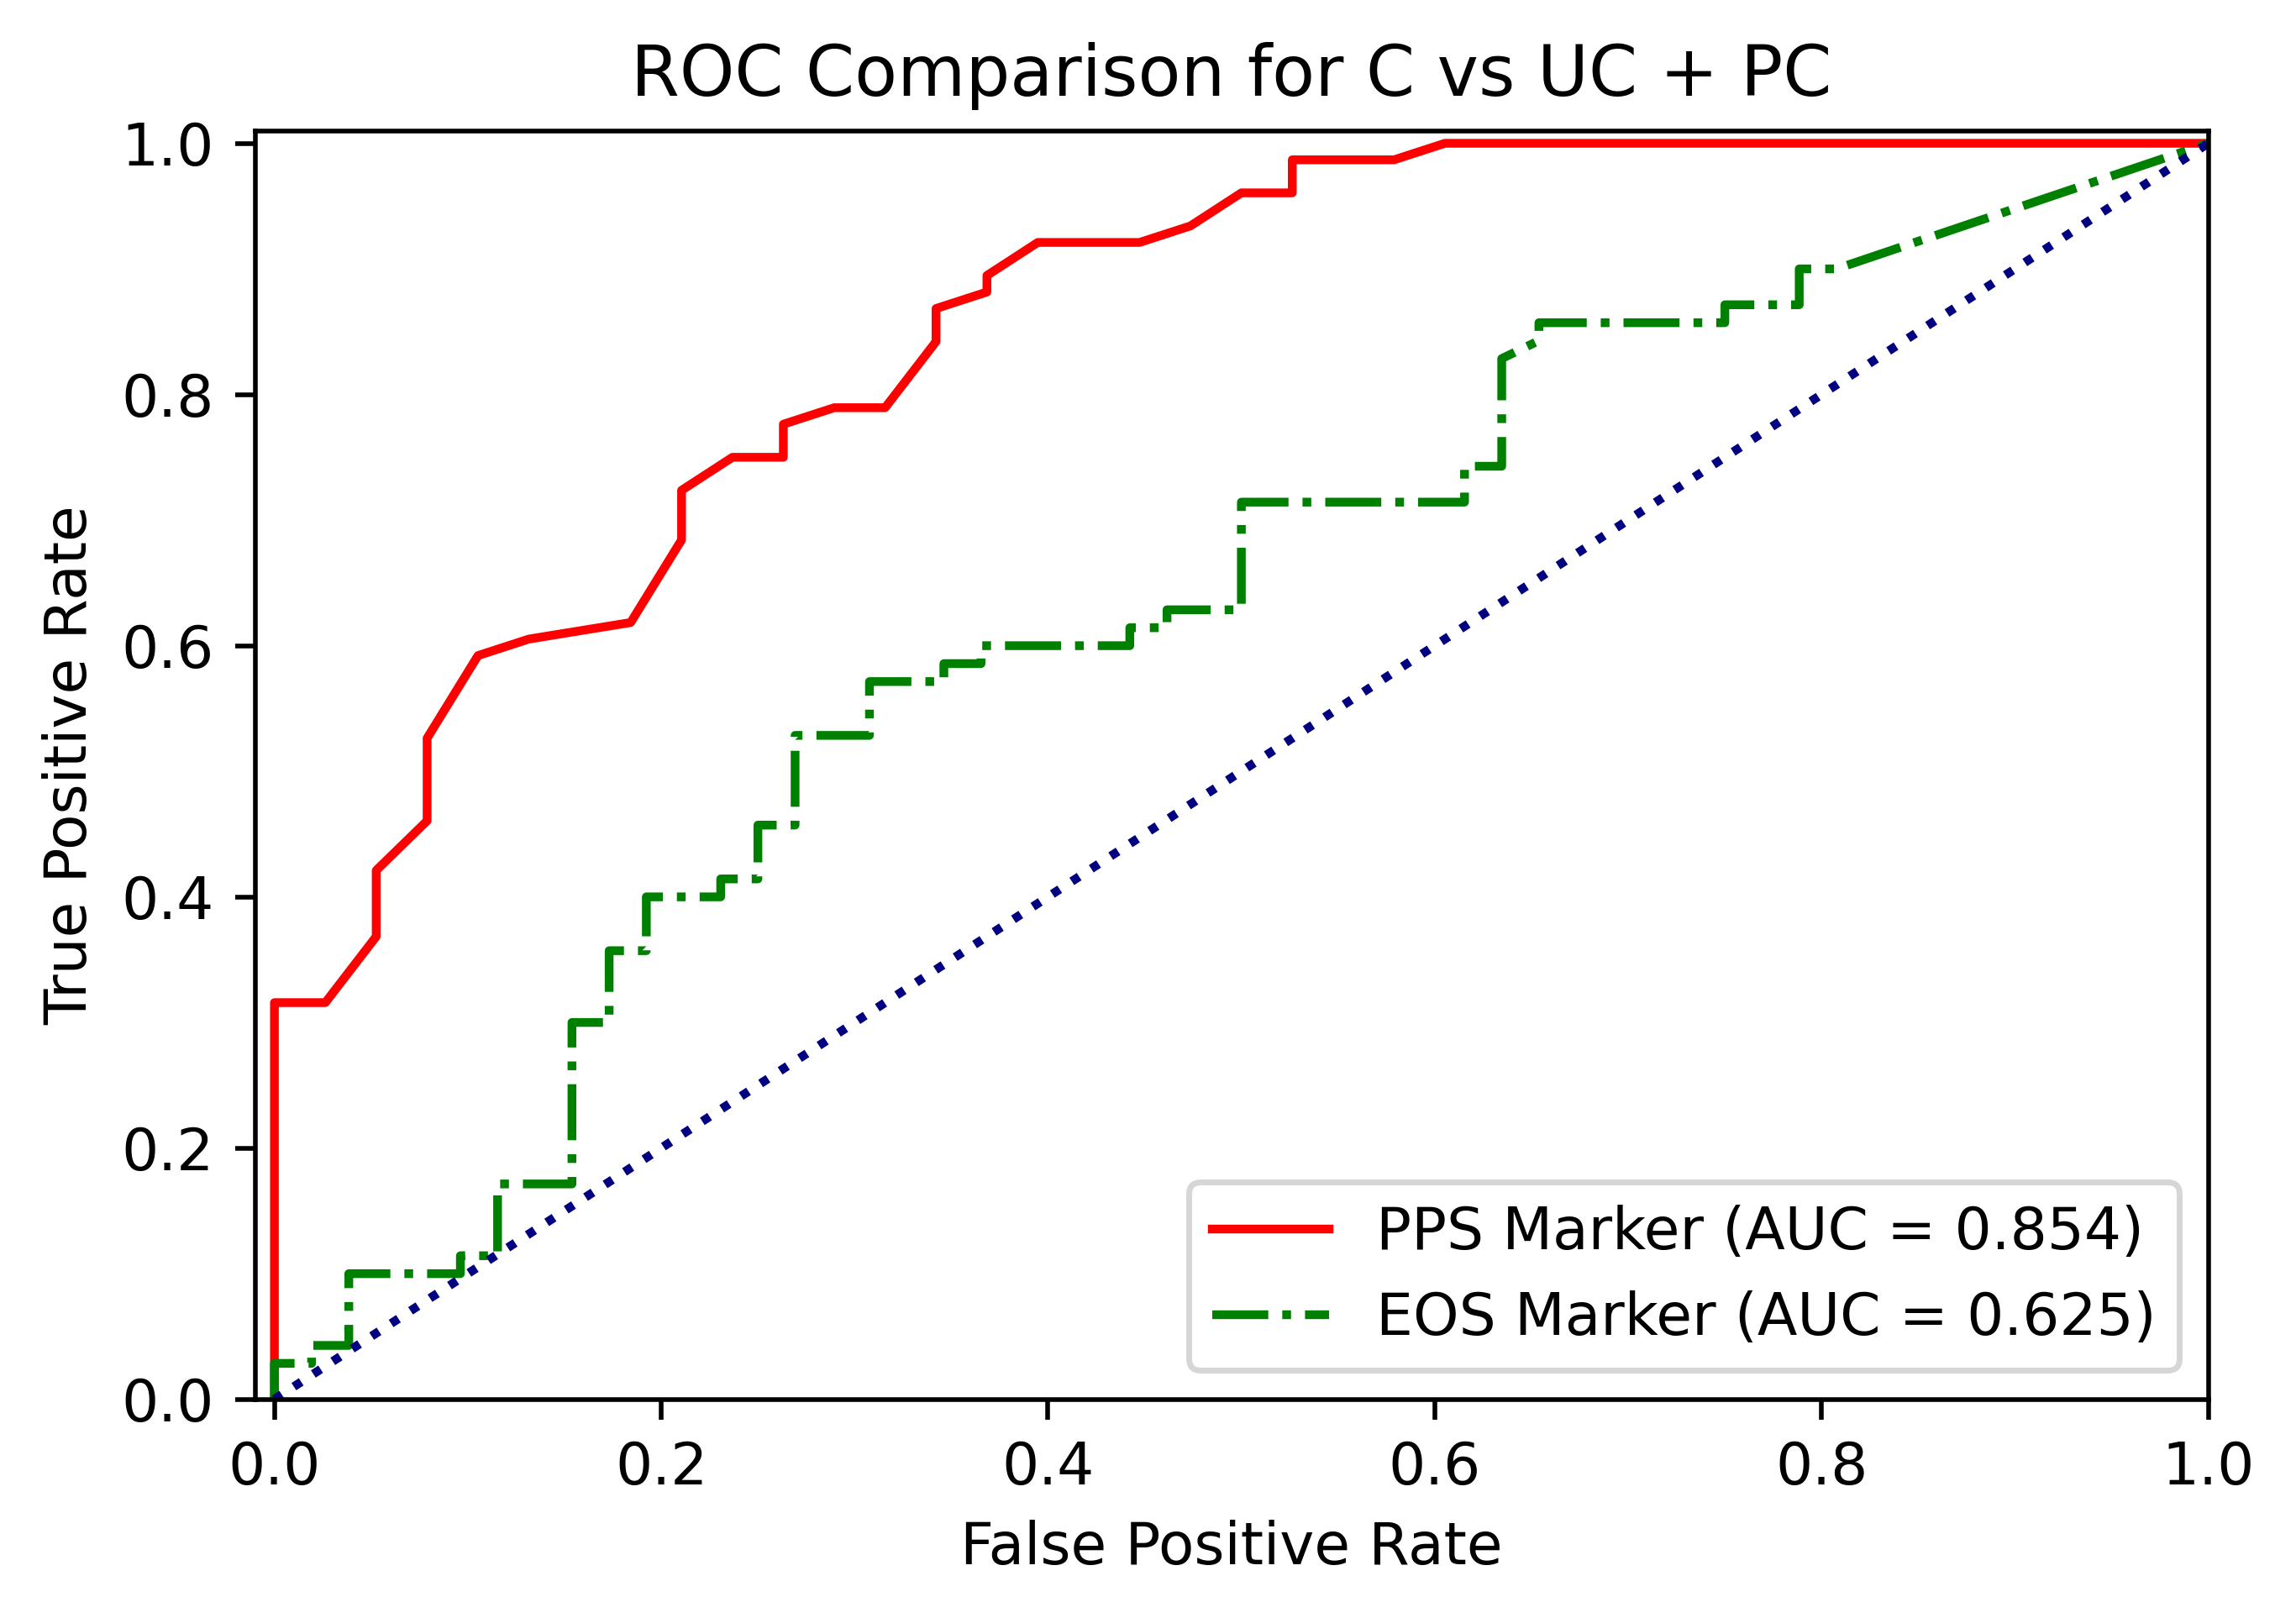

In [43]:
###  Compare the ROC of PPS and EOS


plt.figure()
plt.plot(fpr4, tpr4, color='red', linestyle='-',label='PPS Marker (AUC = %0.3f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='green',linestyle='-.', label='EOS Marker (AUC = %0.3f)' % roc_auc5)
plt.plot([0, 1], [0, 1], color='navy', linestyle=':')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison for C vs UC + PC')
plt.legend(loc="lower right")

In [44]:
###   Figure 2
###   Based on the same code and method above, Figure 2 can be drawn. The code will not be repeated here.
###   y_pps represents the prediction of patients by AI model, 
###   y_true represents the real prognosis of patients.

In [45]:
# c vs nc
y_true6  
y_pps6
# c vs nc+pc
y_true7
y_pps7
# c+pc vs nc
y_true8
y_pps8

In [41]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr6, tpr6, thresholds6 = roc_curve(y_true6, y_pps6)

# Compute ROC area
roc_auc6 = auc(fpr6, tpr6)
print('ROC area is {0}'.format(roc_auc6))

ROC area is 0.945679012345679


In [43]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr7, tpr7, thresholds7 = roc_curve(y_true7, y_pps7)

# Compute ROC area
roc_auc7 = auc(fpr7, tpr7)
print('ROC area is {0}'.format(roc_auc7))

ROC area is 0.8636363636363635


In [45]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr8, tpr8, thresholds8 = roc_curve(y_true8, y_pps8)

# Compute ROC area
roc_auc8 = auc(fpr8, tpr8)
print('ROC area is {0}'.format(roc_auc8))

ROC area is 0.9051724137931034


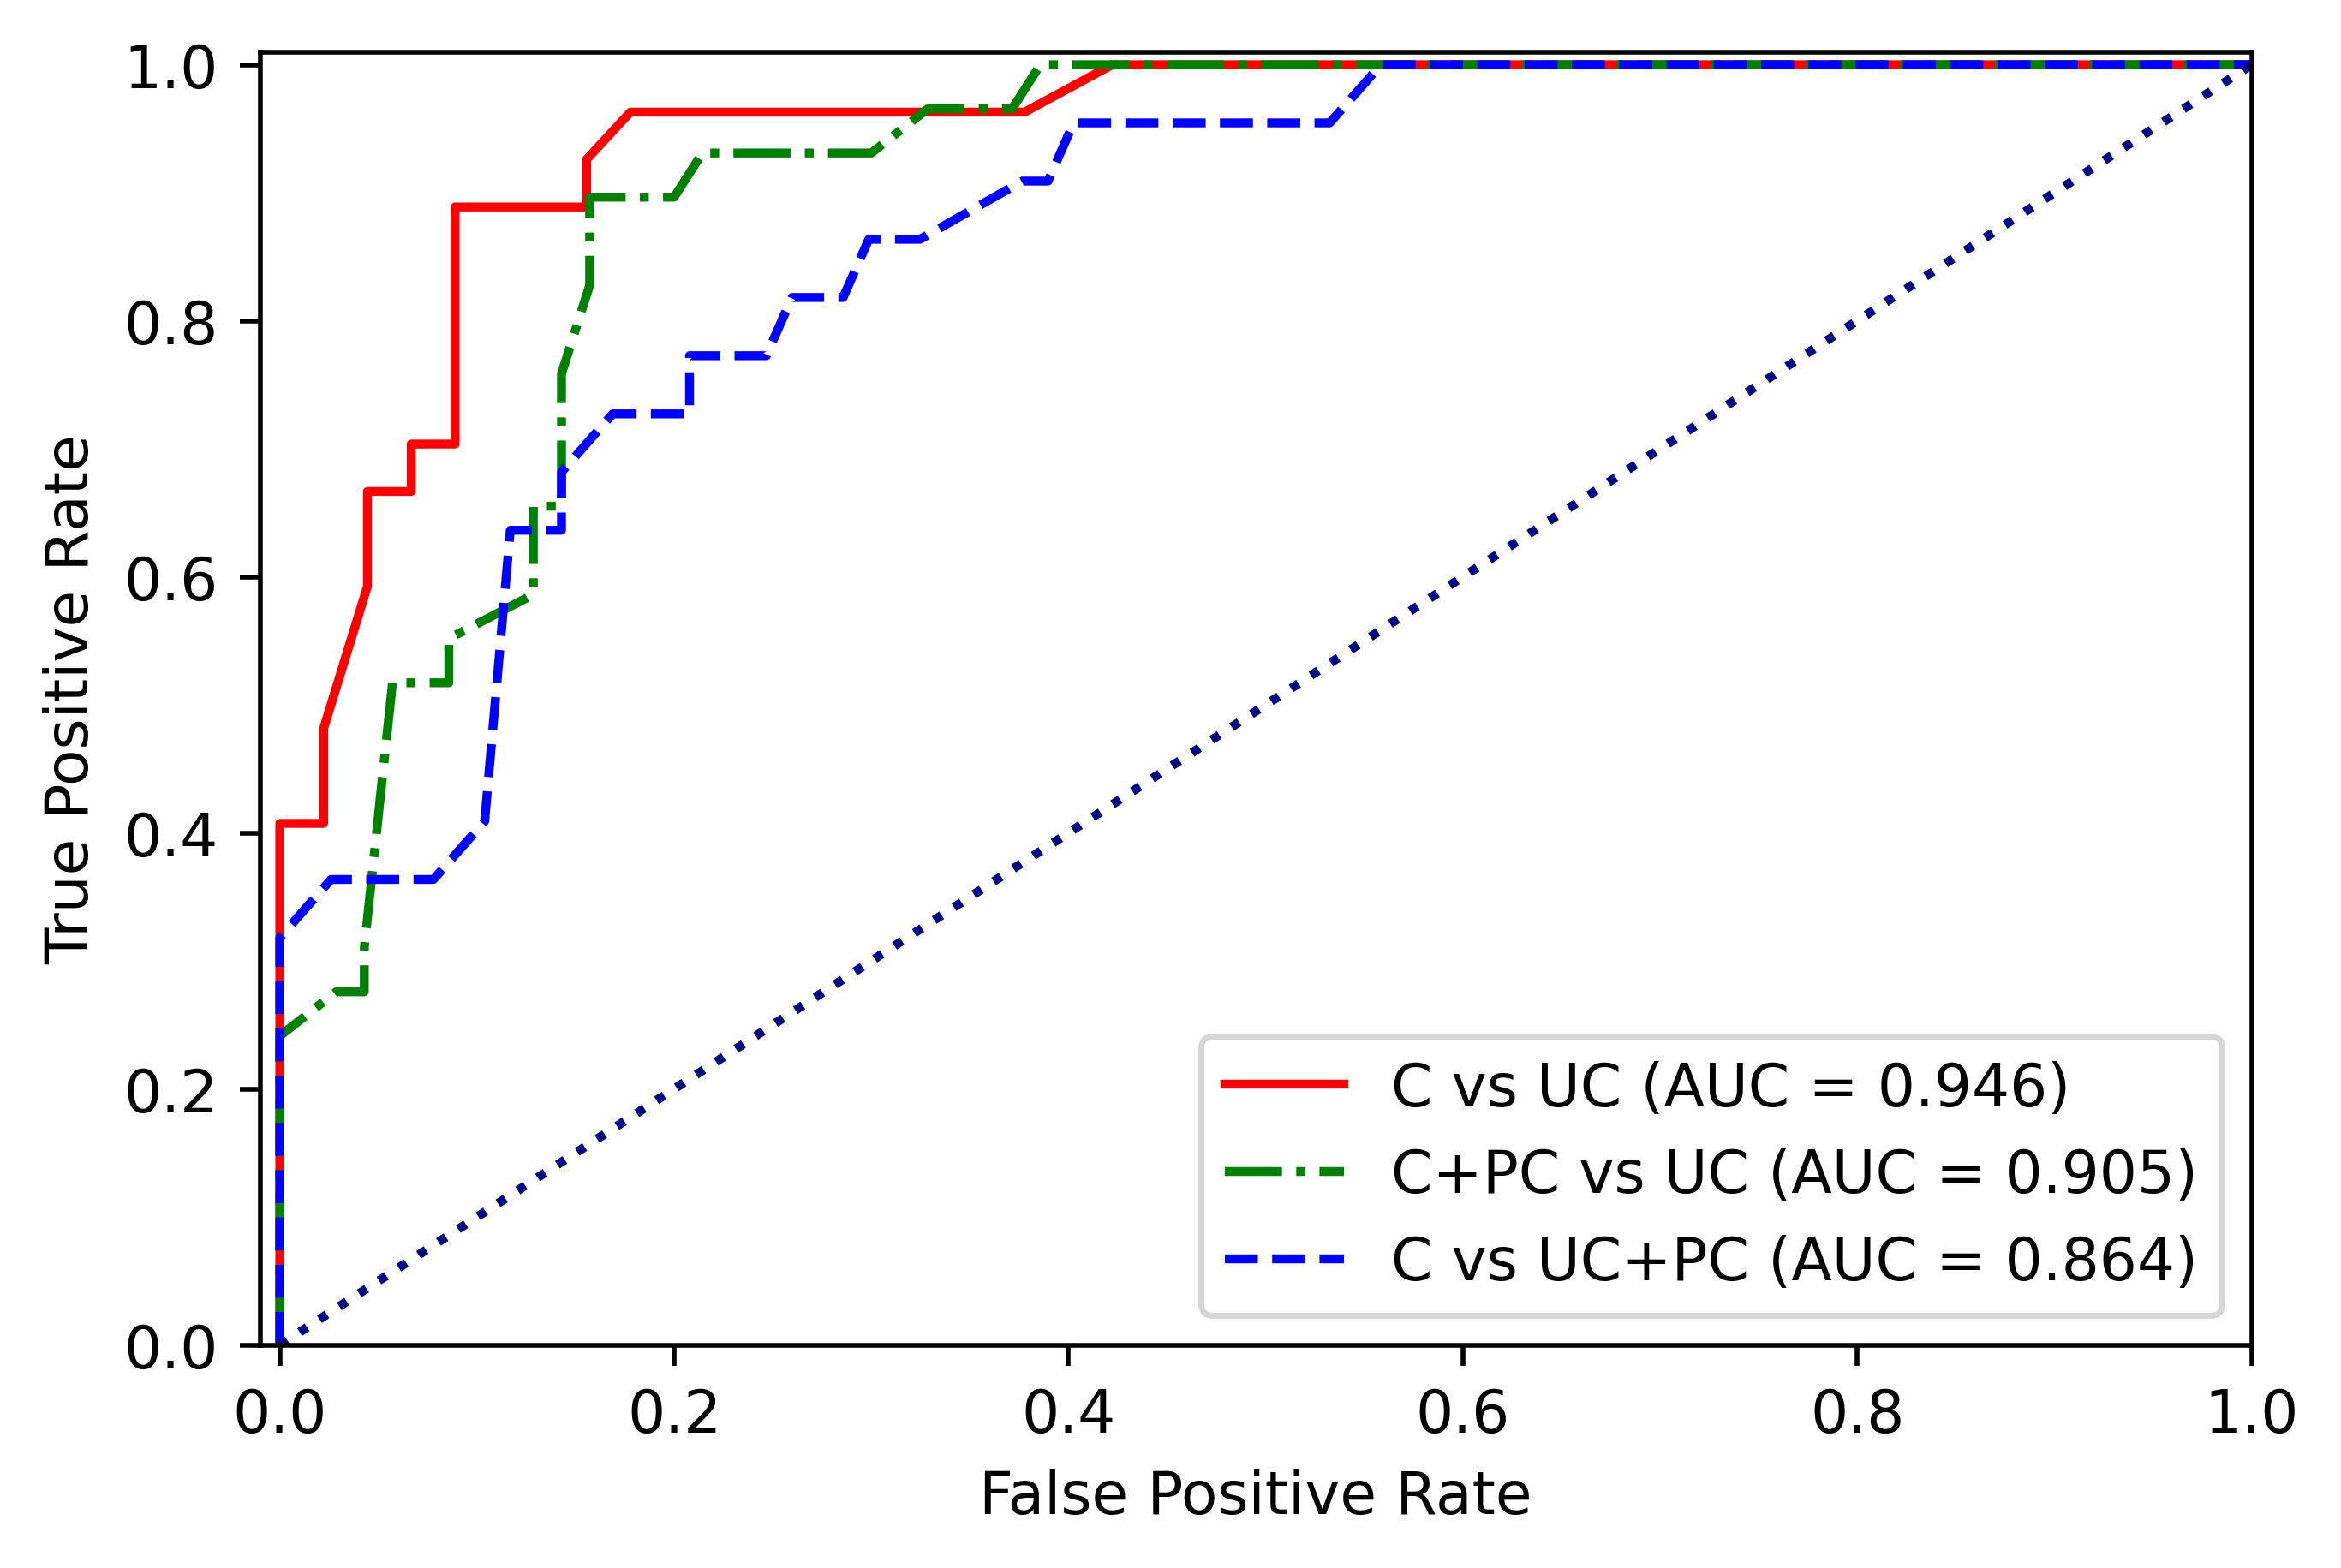

In [47]:
plt.figure()
plt.plot(fpr6, tpr6, color='red', linestyle='-',label='C vs UC (AUC = %0.3f)' % roc_auc6)
plt.plot(fpr8, tpr8, color='green', linestyle='-.',label='C+PC vs UC (AUC = %0.3f)' % roc_auc8)
plt.plot(fpr7, tpr7, color='blue', linestyle='--',label='C vs UC+PC (AUC = %0.3f)' % roc_auc7)

plt.plot([0, 1], [0, 1], color='navy', linestyle=':')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC for PPS on External Test Dataset')
plt.legend(loc="lower right")